## Codigo Desagregado sin agrupacion Semantica

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

In [4]:
# Configuraciones para visualización
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [66]:
df = pd.read_csv('data_5555555555.csv')

In [6]:
# 1. Exploración Inicial
# ==================================================
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras 5 filas del dataset:")
display(df.head())

print("\nInformación del dataset:")
display(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe())

print("\nVerificar valores nulos por columna:")
display(df.isnull().sum())

Dimensiones del dataset: (4313, 6)

Primeras 5 filas del dataset:


,id,search_term,impressions,conversions,cost,account_id
0,2379,jabon dove,16,0.0,3260000,5555555555
1,977,desodorante secret clinical,6,0.0,3360000,5555555555
2,6329,bacardi limon,4,0.0,1430000,5555555555
3,2044,pantalla 40 pulgadas,14,0.0,3780000,5555555555
4,2542,seagrams,14,0.0,280000,5555555555



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4313 entries, 0 to 4312
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4313 non-null   int64  
 1   search_term  4313 non-null   object 
 2   impressions  4313 non-null   int64  
 3   conversions  4313 non-null   float64
 4   cost         4313 non-null   int64  
 5   account_id   4313 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 202.3+ KB


None


Estadísticas descriptivas:


,id,impressions,conversions,cost,account_id
count,4313.000000,4313.000000,4313.0,4.313000e+03,4.313000e+03
mean,5041.042430,18.470206,0.0,2.376265e+06,5.555556e+09
std,2897.149047,72.150942,0.0,6.314673e+06,0.000000e+00
min,0.000000,1.000000,0.0,1.000000e+04,5.555556e+09
25%,2520.000000,1.000000,0.0,2.300000e+05,5.555556e+09
50%,5035.000000,3.000000,0.0,8.500000e+05,5.555556e+09
75%,7583.000000,11.000000,0.0,2.220000e+06,5.555556e+09
max,9998.000000,1992.000000,0.0,1.577500e+08,5.555556e+09



Verificar valores nulos por columna:


id             0
search_term    0
impressions    0
conversions    0
cost           0
account_id     0
dtype: int64


# Análisis Univariante


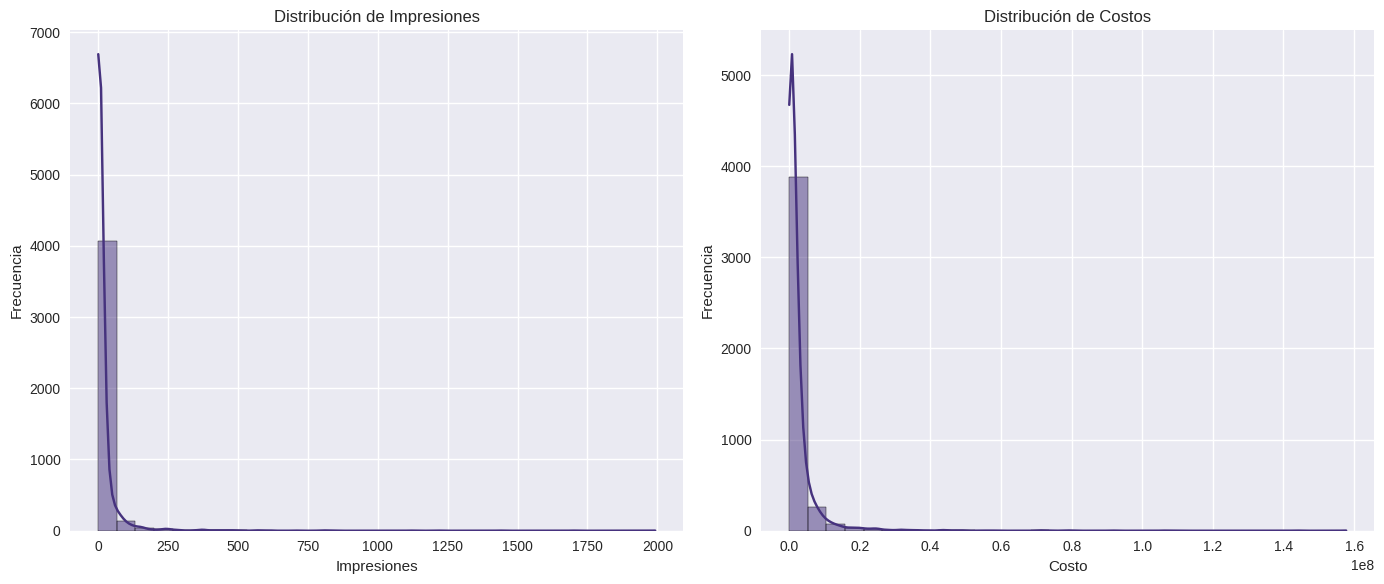


Estadísticas detalladas de impresiones:


count    4313.000000
mean       18.470206
std        72.150942
min         1.000000
10%         1.000000
25%         1.000000
50%         3.000000
75%        11.000000
90%        36.000000
95%        73.400000
99%       251.640000
max      1992.000000
Name: impressions, dtype: float64


Estadísticas detalladas de costos:


count    4.313000e+03
mean     2.376265e+06
std      6.314673e+06
min      1.000000e+04
10%      2.000000e+04
25%      2.300000e+05
50%      8.500000e+05
75%      2.220000e+06
90%      5.228000e+06
95%      8.792000e+06
99%      2.479280e+07
max      1.577500e+08
Name: cost, dtype: float64

In [7]:
# 2. Análisis Univariante
# ==================================================
print("\n# Análisis Univariante")

# Distribución de impresiones
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['impressions'], bins=30, kde=True)
plt.title('Distribución de Impresiones')
plt.xlabel('Impresiones')
plt.ylabel('Frecuencia')

# Distribución de costos
plt.subplot(1, 2, 2)
sns.histplot(df['cost'], bins=30, kde=True)
plt.title('Distribución de Costos')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Estadísticas descriptivas por percentiles
print("\nEstadísticas detalladas de impresiones:")
display(df['impressions'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

print("\nEstadísticas detalladas de costos:")
display(df['cost'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))


# Relación entre Variables


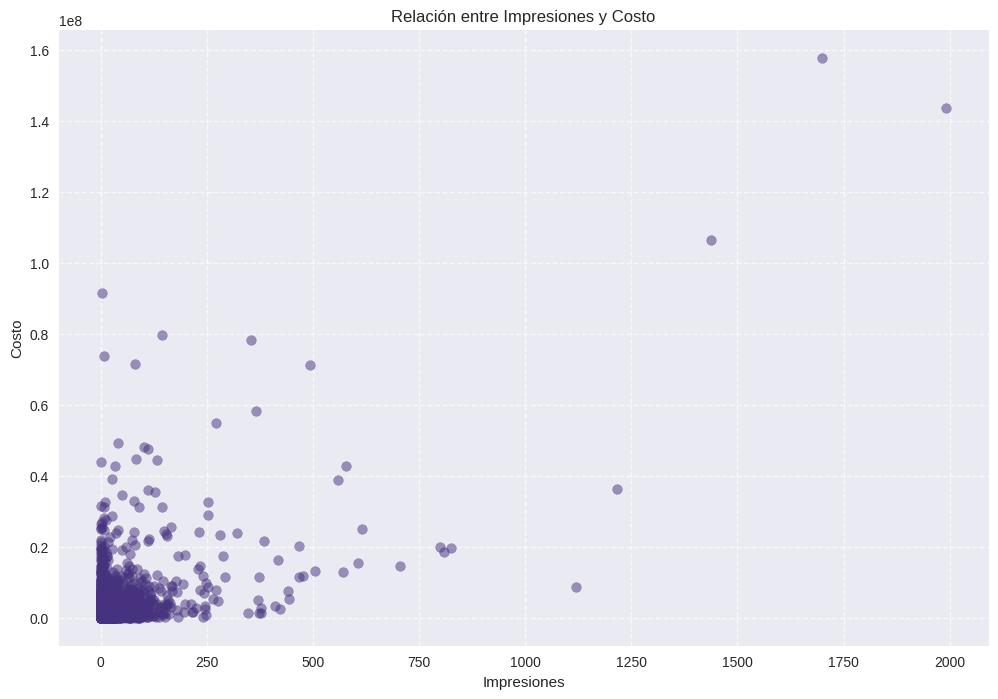

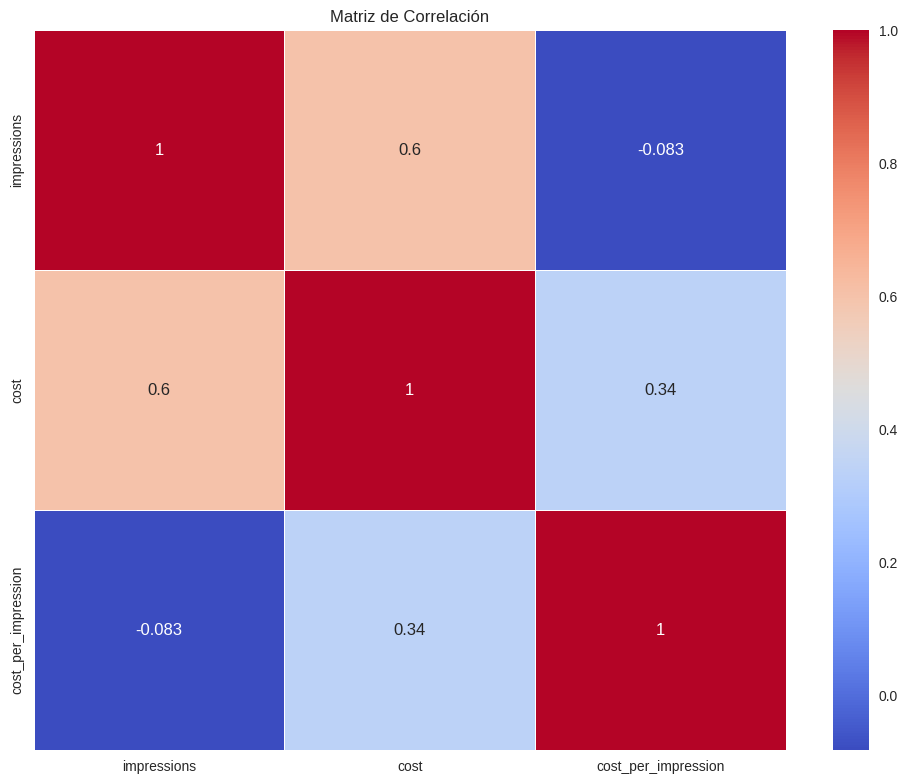

In [8]:
# 3. Relación entre Variables
# ==================================================
print("\n# Relación entre Variables")

# Calcular nuevas métricas para el análisis
df['cost_per_impression'] = df['cost'] / df['impressions']
df.loc[df['impressions'] == 0, 'cost_per_impression'] = 0  # Manejar divisiones por cero

# Gráfico de dispersión entre impresiones y costo
plt.figure(figsize=(12, 8))
plt.scatter(df['impressions'], df['cost'], alpha=0.5)
plt.title('Relación entre Impresiones y Costo')
plt.xlabel('Impresiones')
plt.ylabel('Costo')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Matriz de correlación
correlation_matrix = df[['impressions', 'cost', 'cost_per_impression']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

In [9]:
# 4. Preparación para Clustering
# ==================================================
print("\n# Preparación para Clustering")

# Seleccionar variables para clustering
features = ['impressions', 'cost', 'cost_per_impression']
X = df[features].copy()

# Manejar valores extremos (outliers)
print("\nEstadísticas antes de tratar outliers:")
display(X.describe())

# Detectar y limitar outliers usando el método IQR
for feature in features:
    Q1 = X[feature].quantile(0.25)
    Q3 = X[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X[feature] = X[feature].clip(lower_bound, upper_bound)

print("\nEstadísticas después de tratar outliers:")
display(X.describe())

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Preparación para Clustering

Estadísticas antes de tratar outliers:


,impressions,cost,cost_per_impression
count,4313.000000,4.313000e+03,4.313000e+03
mean,18.470206,2.376265e+06,6.425784e+05
std,72.150942,6.314673e+06,1.587534e+06
min,1.000000,1.000000e+04,1.111111e+02
25%,1.000000,2.300000e+05,3.947368e+04
50%,3.000000,8.500000e+05,1.675000e+05
75%,11.000000,2.220000e+06,5.900000e+05
max,1992.000000,1.577500e+08,3.049667e+07



Estadísticas después de tratar outliers:


,impressions,cost,cost_per_impression
count,4313.000000,4.313000e+03,4.313000e+03
mean,7.721076,1.519063e+06,3.970473e+05
std,8.838972,1.672401e+06,4.765350e+05
min,1.000000,1.000000e+04,1.111111e+02
25%,1.000000,2.300000e+05,3.947368e+04
50%,3.000000,8.500000e+05,1.675000e+05
75%,11.000000,2.220000e+06,5.900000e+05
max,26.000000,5.205000e+06,1.415789e+06



# Determinación del número óptimo de clusters


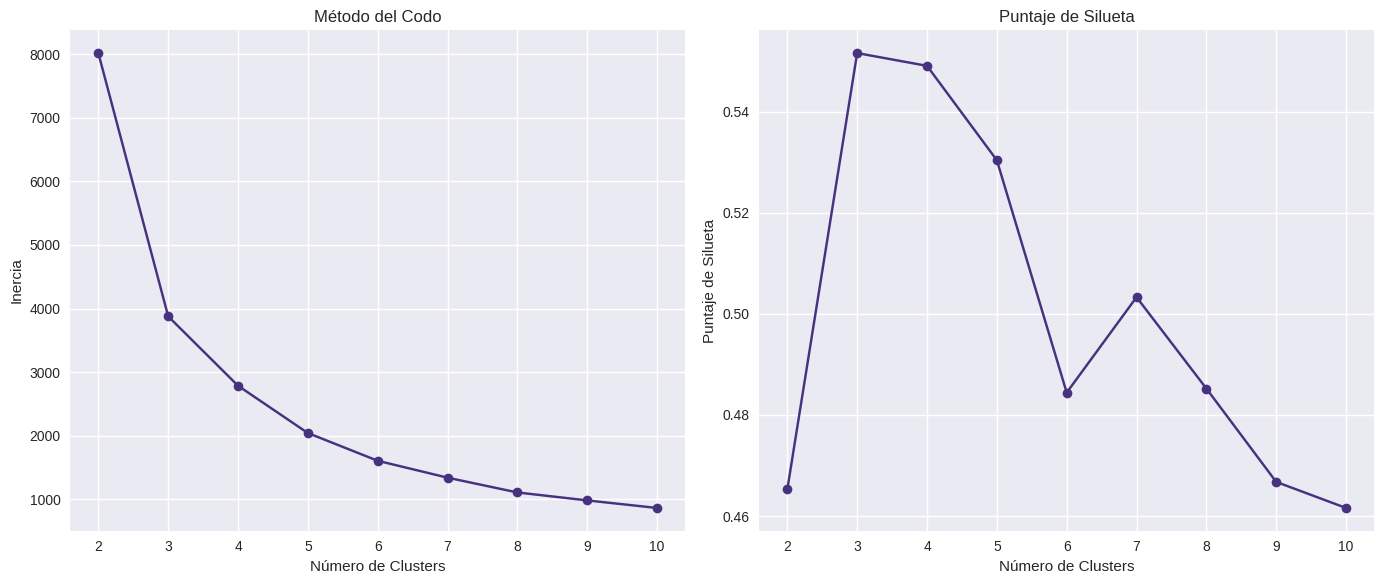

In [10]:

# 5. Determinación del número óptimo de clusters
# ==================================================
print("\n# Determinación del número óptimo de clusters")

# Método del codo (Elbow Method)
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Graficar método del codo
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)

# Graficar puntaje de silueta
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-')
plt.title('Puntaje de Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje de Silueta')
plt.grid(True)
plt.tight_layout()
plt.show()


# Aplicación del Algoritmo de Clustering


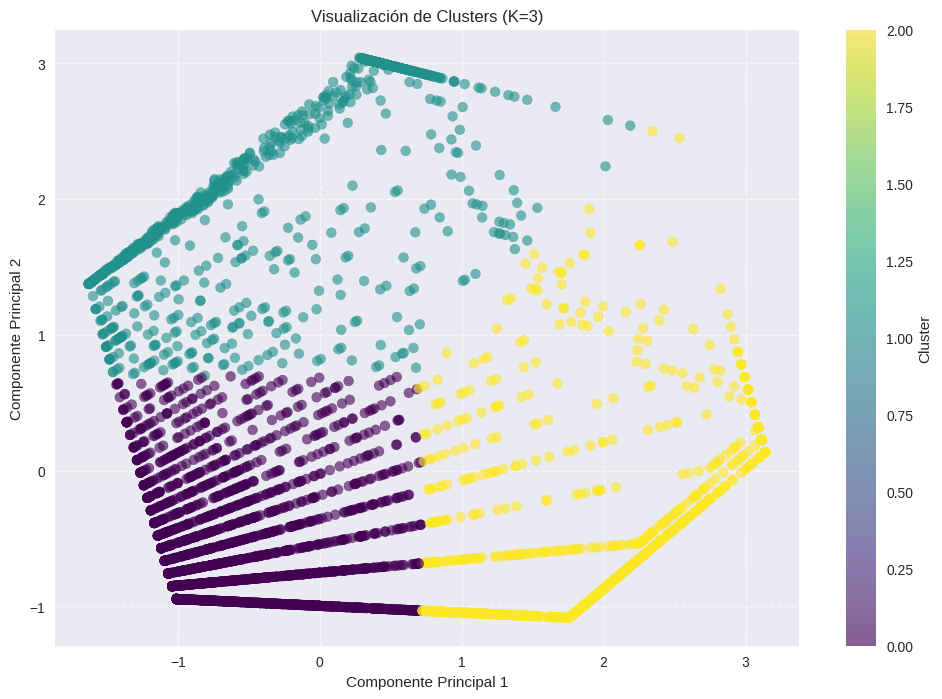

In [11]:

# 6. Aplicación del Algoritmo de Clustering (KMeans)
# ==================================================
print("\n# Aplicación del Algoritmo de Clustering")

# Determinar el número óptimo de clusters basado en el análisis anterior
optimal_k = 3  # Este valor puede cambiar según los resultados del método del codo y silueta

# Aplicar KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar los clusters (usando PCA para reducción de dimensionalidad)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6, s=50)
plt.title(f'Visualización de Clusters (K={optimal_k})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Análisis de Clusters


impressions                                   cost             \
               mean median         std count          mean     median   
cluster                                                                 
0          4.005587    3.0    3.559358  2506  5.593855e+05   380000.0   
1         76.151755   36.0  145.655208   883  5.270159e+06  2250000.0   
2          2.577922    1.0    2.926583   924  4.538377e+06  2815000.0   

                            cost_per_impression                              \
                  std count                mean        median           std   
cluster                                                                       
0        6.030678e+05  2506        2.020799e+05  1.300000e+05  2.122991e+05   
1        1.147405e+07   883        1.019112e+05  5.331361e+04  1.353890e+05   
2        6.151301e+06   924        2.353940e+06  1.460000e+06  2.809934e+06   

               
        count  
cluster        
0        2506  
1         883  
2         924

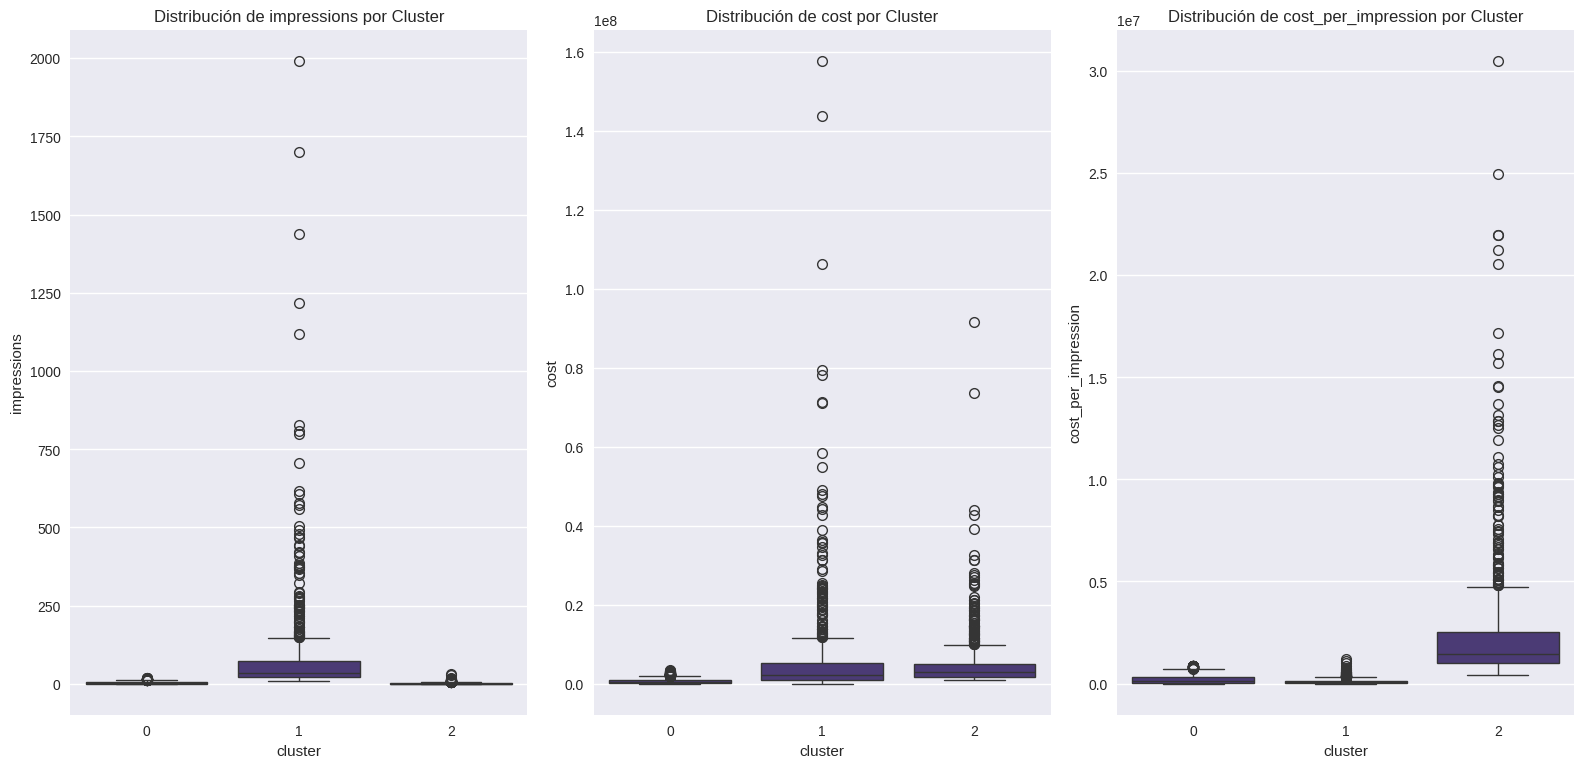

In [12]:
# 7. Análisis de Clusters
# ==================================================
print("\n# Análisis de Clusters")

# Estadísticas por cluster
cluster_stats = df.groupby('cluster')[features].agg(['mean', 'median', 'std', 'count'])
display(cluster_stats)

# Visualización de características por cluster
plt.figure(figsize=(16, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Distribución de {feature} por Cluster')
plt.tight_layout()
plt.show()

In [13]:
# 8. Caracterización de Clusters
# ==================================================
print("\n# Caracterización de Clusters")

# Asignar etiquetas a los clusters
cluster_labels = {
    0: "Cluster A", 
    1: "Cluster B", 
    2: "Cluster C", 
}

df['cluster_label'] = df['cluster'].map(cluster_labels)

# Descripción de cada cluster
print("\nDescripción de cada cluster:")
for cluster_id, label in cluster_labels.items():
    cluster_data = df[df['cluster'] == cluster_id]
    print(f"\n{label} (Tamaño: {len(cluster_data)})")
    print("-" * 50)
    print(f"Impresiones promedio: {cluster_data['impressions'].mean():.2f}")
    print(f"Costo promedio: {cluster_data['cost'].mean():.2f}")
    print(f"Costo por impresión promedio: {cluster_data['cost_per_impression'].mean():.2f}")
    print(f"Top 5 términos de búsqueda más frecuentes:")
    top_terms = cluster_data['search_term'].value_counts().head(5)
    for term, count in top_terms.items():
        print(f"  - {term}: {count}")


# Caracterización de Clusters

Descripción de cada cluster:

Cluster A (Tamaño: 2506)
--------------------------------------------------
Impresiones promedio: 4.01
Costo promedio: 559385.47
Costo por impresión promedio: 202079.93
Top 5 términos de búsqueda más frecuentes:
  - estufa tienda: 5
  - suavitel tienda: 4
  - ofertas tienda: 4
  - switch lite: 3
  - jabon tienda: 3

Cluster B (Tamaño: 883)
--------------------------------------------------
Impresiones promedio: 76.15
Costo promedio: 5270158.55
Costo por impresión promedio: 101911.24
Top 5 términos de búsqueda más frecuentes:
  - tienda en linea: 18
  - walmart: 12
  - lavadora: 10
  - refrigeradores: 9
  - lavadoras: 8

Cluster C (Tamaño: 924)
--------------------------------------------------
Impresiones promedio: 2.58
Costo promedio: 4538376.62
Costo por impresión promedio: 2353940.20
Top 5 términos de búsqueda más frecuentes:
  - tienda en linea: 5
  - walmart: 4
  - aurrera: 4
  - licores: 4
  - soriana: 4


In [14]:
# 9. Preparación para guardar en la base de datos
# ==================================================
print("\n# Preparación para guardar en la base de datos")

# Crear DataFrame para guardar en la tabla 'clusters'
clusters_df = df[['id', 'search_term', 'cluster', 'cluster_label']].copy()
print("\nDatos que se guardarán en la tabla 'clusters':")
display(clusters_df.head())

# Guardar resultados para su uso posterior
clusters_df.to_csv('clusters_results.csv', index=False)
print("\nResultados de clustering guardados en 'clusters_results.csv'")


# Preparación para guardar en la base de datos

Datos que se guardarán en la tabla 'clusters':


,id,search_term,cluster,cluster_label
0,2379,jabon dove,1,Cluster B
1,977,desodorante secret clinical,2,Cluster C
2,6329,bacardi limon,0,Cluster A
3,2044,pantalla 40 pulgadas,1,Cluster B
4,2542,seagrams,0,Cluster A



Resultados de clustering guardados en 'clusters_results.csv'


In [15]:
# 10. Conclusiones
# ==================================================
print("\n# Conclusiones")
print("""
Basado en el análisis de clustering realizado, hemos identificado patrones significativos 
en los términos de búsqueda del cliente con ID 5555555555. Los clusters identificados 
pueden ayudar a optimizar las estrategias de marketing, enfocando los recursos en los 
términos más efectivos y mejorando el rendimiento de las campañas publicitarias.

Los insights clave de cada cluster incluyen:
- Cluster A: [Describir características principales]
- Cluster B: [Describir características principales]
- Cluster C: [Describir características principales]

Estas agrupaciones permiten una segmentación estratégica de los términos de búsqueda,
facilitando decisiones más informadas sobre la asignación de presupuesto y la optimización
de campañas publicitarias.
""")


# Conclusiones

Basado en el análisis de clustering realizado, hemos identificado patrones significativos 
en los términos de búsqueda del cliente con ID 5555555555. Los clusters identificados 
pueden ayudar a optimizar las estrategias de marketing, enfocando los recursos en los 
términos más efectivos y mejorando el rendimiento de las campañas publicitarias.

Los insights clave de cada cluster incluyen:
- Cluster A: [Describir características principales]
- Cluster B: [Describir características principales]
- Cluster C: [Describir características principales]

Estas agrupaciones permiten una segmentación estratégica de los términos de búsqueda,
facilitando decisiones más informadas sobre la asignación de presupuesto y la optimización
de campañas publicitarias.



## Codigo Desagregado con agrupacion Semantica

In [68]:
# Análisis de Clustering con Semántica de Términos de Búsqueda
# ==================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
import warnings
from nltk.corpus import stopwords
import nltk
import re
import joblib
from sentence_transformers import SentenceTransformer

In [69]:
# Configuraciones para visualización
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 12

# Descargar stopwords en español
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Cargar los datos extraídos
print("Cargando datos...")
df = pd.read_csv('data_5555555555.csv')
print(f"Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")

Cargando datos...
Dataset cargado: 4313 filas, 6 columnas


In [70]:
# 1. Exploración Inicial y Preprocesamiento
# ==================================================
print("\n# 1. Exploración Inicial y Preprocesamiento")

# Limpiar términos de búsqueda: quitar caracteres especiales y convertir a minúsculas
print("Limpiando términos de búsqueda...")
df['search_term_clean'] = df['search_term'].apply(lambda x: re.sub(r'[^\w\s]', ' ', str(x).lower()))

# Calcular costo por impresión
df['cost_per_impression'] = df['cost'] / df['impressions']
df.loc[df['impressions'] == 0, 'cost_per_impression'] = 0  # Manejar divisiones por cero

# Mostrar número de términos de búsqueda únicos
unique_terms = df['search_term'].nunique()
print(f"Número de términos de búsqueda únicos: {unique_terms}")


# 1. Exploración Inicial y Preprocesamiento
Limpiando términos de búsqueda...
Número de términos de búsqueda únicos: 3485


In [71]:
# 2. Procesamiento de datos numéricos
# ==================================================
print("\n# 2. Procesamiento de datos numéricos")

# Seleccionar variables numéricas para análisis
numeric_features = ['impressions', 'cost', 'cost_per_impression']
X_numeric = df[numeric_features].copy()

# Manejar valores extremos (outliers)
for feature in numeric_features:
    Q1 = X_numeric[feature].quantile(0.25)
    Q3 = X_numeric[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_numeric[feature] = X_numeric[feature].clip(lower_bound, upper_bound)

# Escalar características numéricas
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)
print("Datos numéricos preprocesados y escalados")


# 2. Procesamiento de datos numéricos
Datos numéricos preprocesados y escalados



# 3. Procesamiento de datos textuales con Sentence Transformers
Procesando 3485 términos de búsqueda únicos...
Cargando modelo de embeddings...
Modelo de embeddings cargado correctamente
Generando embeddings con Sentence Transformers...


Batches:   0%|          | 0/109 [00:00<?, ?it/s]


# 3.1 Determinación de dimensionalidad óptima para PCA


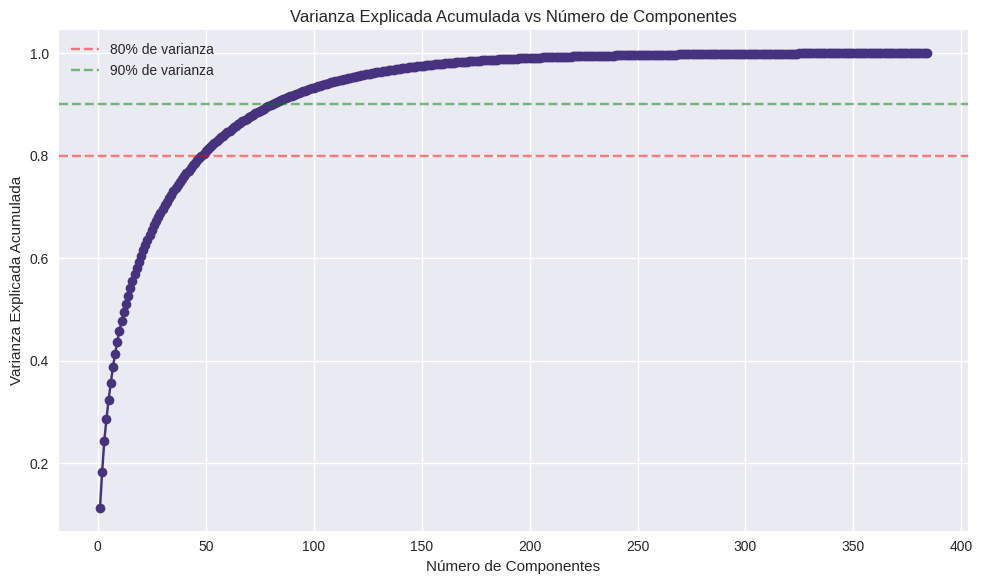

Componentes necesarios para explicar el 80% de varianza: 49
Componentes necesarios para explicar el 90% de varianza: 81
Componentes necesarios para explicar el 95% de varianza: 115

Dimensionalidad óptima seleccionada: 49 componentes

# 3.2 Aplicación de PCA con dimensionalidad óptima
Varianza explicada con 49 componentes: 0.8041
Dimensionalidad reducida a 49 características


In [ ]:
# 3. Procesamiento de datos textuales con Sentence Transformers
# ==================================================
print("\n# 3. Procesamiento de datos textuales con Sentence Transformers")
# Crear lista única de términos de búsqueda para procesar
unique_search_terms = df['search_term_clean'].unique()
print(f"Procesando {len(unique_search_terms)} términos de búsqueda únicos...")

# Cargar modelo de embeddings multilingüe
print("Cargando modelo de embeddings...")
try:
    model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
    print("Modelo de embeddings cargado correctamente")
    
    # Generar embeddings para términos únicos
    print("Generando embeddings con Sentence Transformers...")
    term_embeddings = model.encode(unique_search_terms, show_progress_bar=True)
    
    # Crear diccionario para mapear términos a embeddings
    term_to_embedding = dict(zip(unique_search_terms, term_embeddings))
    
    # Asignar embeddings a cada fila del dataframe
    search_term_embeddings = np.array([term_to_embedding[term] for term in df['search_term_clean']])
    
    # PASO INTERMEDIO: Determinar dimensionalidad óptima para PCA
    print("\n# 3.1 Determinación de dimensionalidad óptima para PCA")
    
    # Aplicar PCA sin limitar componentes para análisis
    pca_analysis = PCA(random_state=42)
    pca_analysis.fit(search_term_embeddings)
    
    # Calcular varianza explicada acumulativa
    cumulative_variance = np.cumsum(pca_analysis.explained_variance_ratio_)
    
    # Graficar curva de varianza explicada
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
    plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.5, label='80% de varianza')
    plt.axhline(y=0.9, color='g', linestyle='--', alpha=0.5, label='90% de varianza')
    plt.title('Varianza Explicada Acumulada vs Número de Componentes')
    plt.xlabel('Número de Componentes')
    plt.ylabel('Varianza Explicada Acumulada')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig('pca_variance_analysis.png')
    plt.show()
    
    # Determinar número de componentes para diferentes umbrales de varianza
    threshold_80 = np.argmax(cumulative_variance >= 0.8) + 1
    threshold_90 = np.argmax(cumulative_variance >= 0.9) + 1
    threshold_95 = np.argmax(cumulative_variance >= 0.95) + 1
    
    print(f"Componentes necesarios para explicar el 80% de varianza: {threshold_80}")
    print(f"Componentes necesarios para explicar el 90% de varianza: {threshold_90}")
    print(f"Componentes necesarios para explicar el 95% de varianza: {threshold_95}")
    
    # Seleccionar dimensionalidad basada en un umbral de varianza explicada
    optimal_components = threshold_80
    print(f"\nDimensionalidad óptima seleccionada: {optimal_components} componentes")
    
    # Continuar con PCA usando la dimensionalidad óptima
    print("\n# 3.2 Aplicación de PCA con dimensionalidad óptima")
    pca_text = PCA(n_components=optimal_components, random_state=42)
    text_features_reduced = pca_text.fit_transform(search_term_embeddings)
    print(f"Varianza explicada con {optimal_components} componentes: {np.sum(pca_text.explained_variance_ratio_):.4f}")
    
except Exception as e:
    print(f"Error al usar Sentence Transformers: {e}")
    print("Usando enfoque alternativo con TF-IDF")
    
    # Usar TF-IDF como alternativa si falla Sentence Transformers
    tfidf = TfidfVectorizer(max_features=100, stop_words=stopwords.words('spanish') + stopwords.words('english'))
    tfidf_matrix = tfidf.fit_transform(df['search_term_clean'])
    
    # Reducir dimensionalidad con PCA para TF-IDF
    pca_text = PCA(n_components=40, random_state=42)
    text_features_reduced = pca_text.fit_transform(tfidf_matrix.toarray())
    print(f"Varianza explicada por los componentes de PCA con TF-IDF: {np.sum(pca_text.explained_variance_ratio_):.2f}")

print(f"Dimensionalidad reducida a {text_features_reduced.shape[1]} características")

In [73]:
# 4. Combinar características numéricas y textuales
# ==================================================
print("\n# 4. Combinar características numéricas y textuales")

# Combinar características para clustering
X_combined = np.hstack((X_numeric_scaled, text_features_reduced))
print(f"Matriz combinada para clustering: {X_combined.shape}")


# 4. Combinar características numéricas y textuales
Matriz combinada para clustering: (4313, 52)



# 5. Determinación del número óptimo de clusters
Evaluando k=2...
Evaluando k=3...
Evaluando k=4...
Evaluando k=5...
Evaluando k=6...
Evaluando k=7...
Evaluando k=8...
Evaluando k=9...
Evaluando k=10...


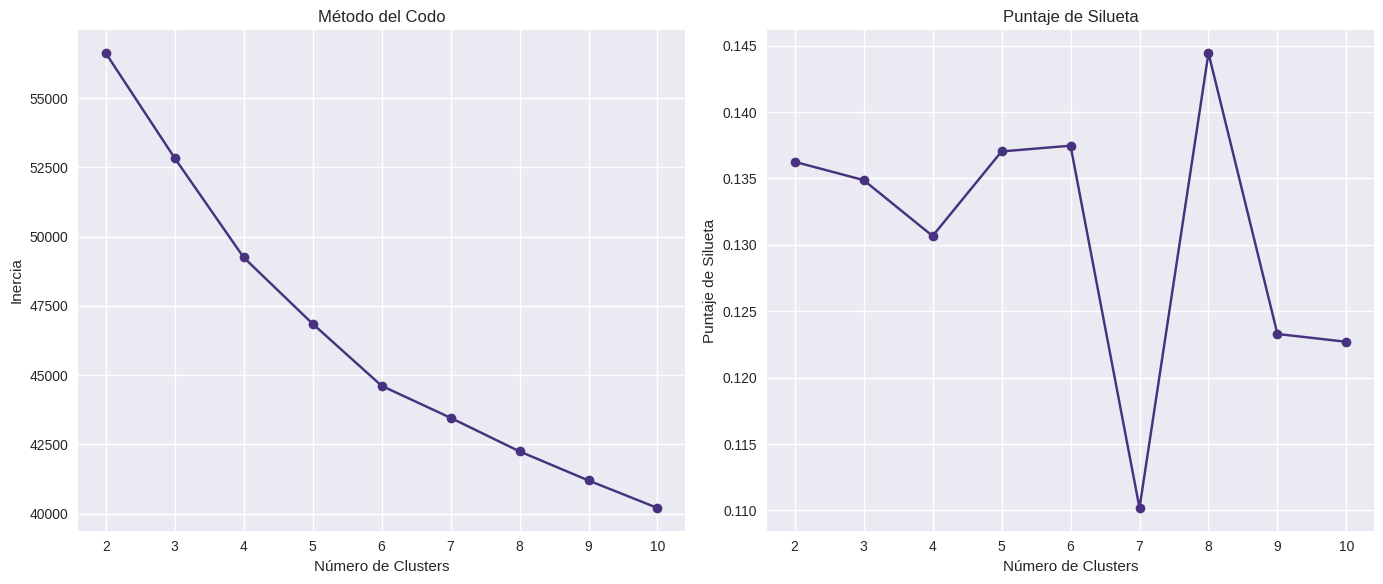

Número óptimo de clusters basado en silueta: 8


In [74]:
# 5. Determinación del número óptimo de clusters
# ==================================================
print("\n# 5. Determinación del número óptimo de clusters")

# Método del codo (Elbow Method) y silueta
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    print(f"Evaluando k={k}...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_combined)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_combined, kmeans.labels_))

# Graficar método del codo
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)

# Graficar puntaje de silueta
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-')
plt.title('Puntaje de Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje de Silueta')
plt.grid(True)
plt.tight_layout()
plt.savefig('optimal_clusters.png')
plt.show()

# Determinar el número óptimo de clusters
best_k_index = np.argmax(silhouette_scores)
optimal_k = k_range[best_k_index]
print(f"Número óptimo de clusters basado en silueta: {optimal_k}")

# Con estas líneas:
#optimal_k = 7  # Forzar el uso de 6 clusters
#print(f"Usando k=6 clusters según preferencia del usuario (en lugar del valor óptimo automático)")
#print(f"Puntaje de silueta para k=6: {silhouette_scores[4]}")  # El índice 4 corresponde a k=6 (ya que k_range comienza en 2)



# 6. Aplicación del Algoritmo de Clustering (K=8)
Generando visualización t-SNE para los clusters...


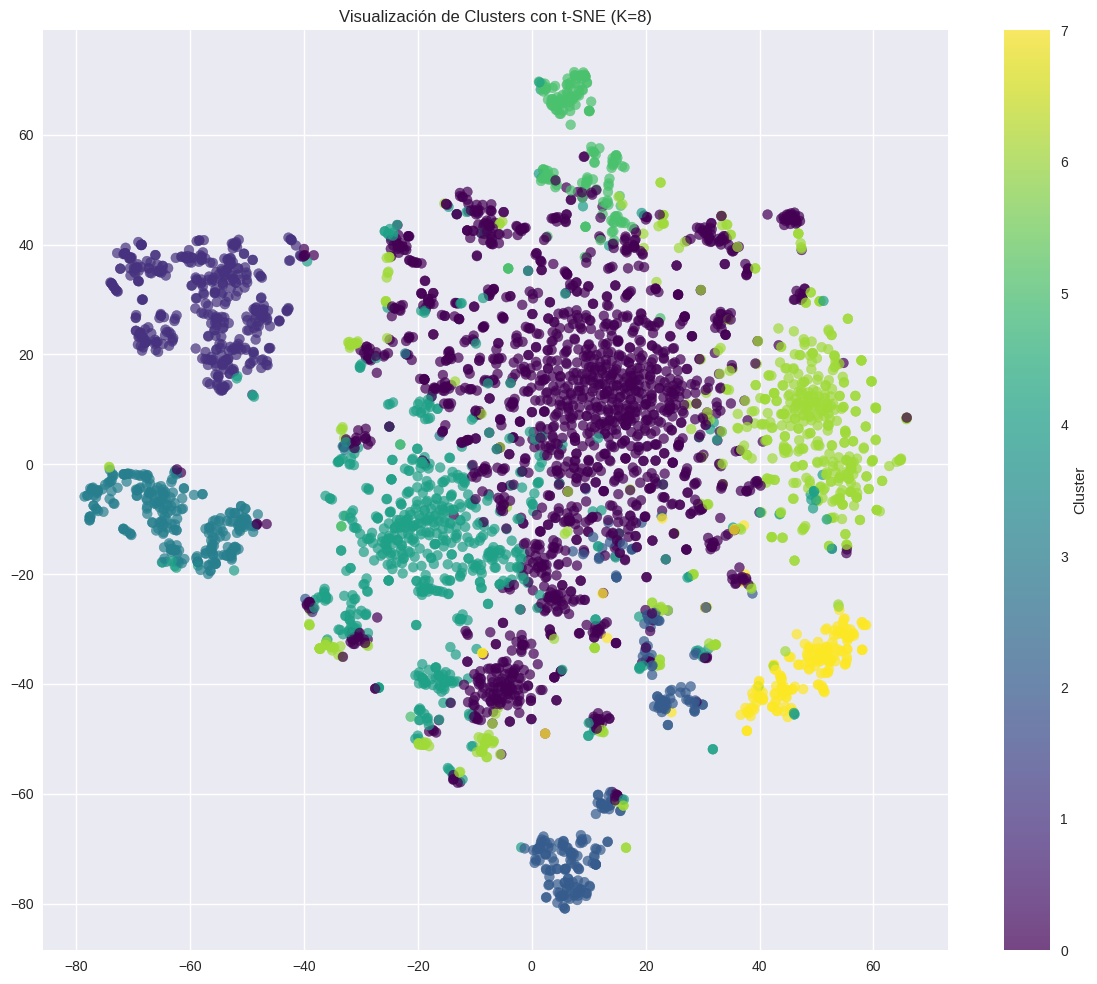

In [46]:
# 6. Aplicación del Algoritmo de Clustering (KMeans)
# ==================================================
print(f"\n# 6. Aplicación del Algoritmo de Clustering (K={optimal_k})")

# Aplicar KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_combined)

# Visualizar los clusters con t-SNE para mejor separación visual
print("Generando visualización t-SNE para los clusters...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_combined)

# Crear gráfico de dispersión
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'], cmap='viridis', alpha=0.7, s=50)
plt.title(f'Visualización de Clusters con t-SNE (K={optimal_k})')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.savefig('clusters_tsne.png')
plt.show()


# 6.1 Renombrar clusters con nombres significativos

Resumen de clusters con nombres descriptivos:

Productos básicos y abarrotes (Cluster 0, Tamaño: 1782)
------------------------------------------------------------
Impresiones promedio: 3.78
Costo promedio: 495325.48
Costo por impresión promedio: 188912.30
Top 5 términos representativos:
 - ofertas tienda: 4
 - suavitel tienda: 4
 - leche evaporada: 4
 - t bone: 3
 - estufa tienda: 3

Refrigeradores y sistemas de refrigeración (Cluster 1, Tamaño: 404)
------------------------------------------------------------
Impresiones promedio: 35.77
Costo promedio: 5378267.33
Costo por impresión promedio: 941474.49
Top 5 términos representativos:
 - refrigerador: 10
 - refrigeradores: 10
 - refrigerador 14 pies: 8
 - refrigerador 11 pies: 6
 - refrigeradores en oferta: 5

Tecnología y computación (Cluster 2, Tamaño: 241)
------------------------------------------------------------
Impresiones promedio: 20.66
Costo promedio: 2470829.88
Costo po

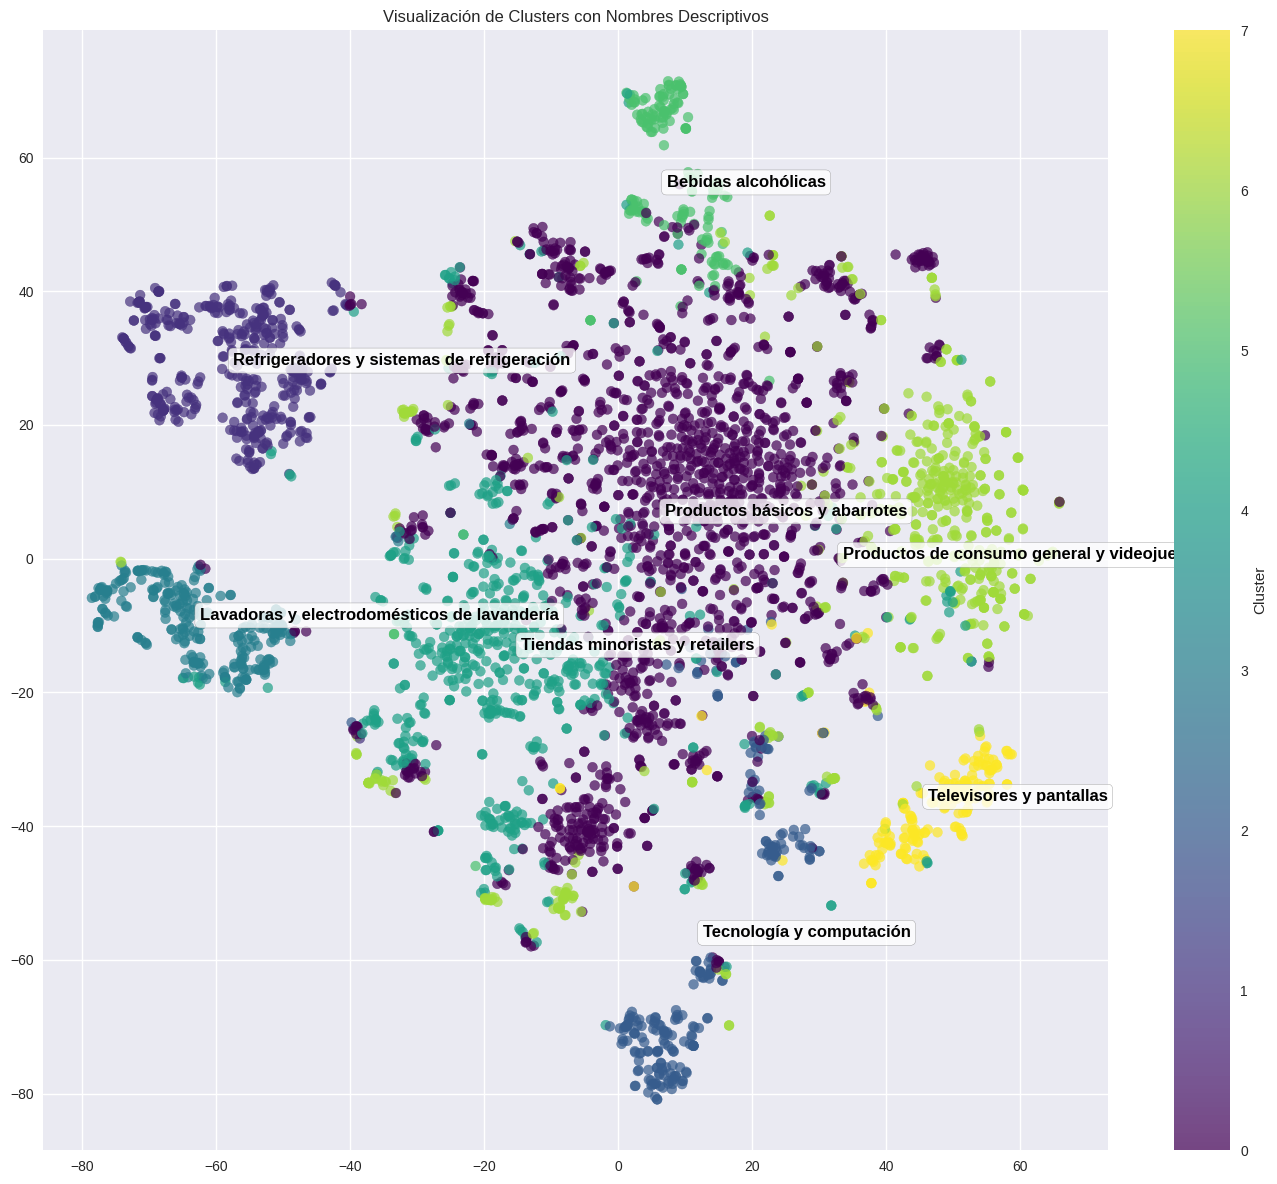

In [55]:
# 6.1 Renombrar clusters con nombres significativos
# ==================================================
print("\n# 6.1 Renombrar clusters con nombres significativos")

# Asignar nombres descriptivos basados en el análisis manual de los términos frecuentes
descriptive_names = {
    0: "Productos básicos y abarrotes",
    1: "Refrigeradores y sistemas de refrigeración",
    2: "Tecnología y computación",
    3: "Lavadoras y electrodomésticos de lavandería",
    4: "Tiendas minoristas y retailers",
    5: "Bebidas alcohólicas",
    6: "Productos de consumo general y videojuegos",
    7: "Televisores y pantallas"
}

# Aplicar nombres descriptivos al dataframe
df['cluster_name'] = df['cluster'].map(descriptive_names)

# Mostrar resumen con nombres descriptivos
print("\nResumen de clusters con nombres descriptivos:")
for cluster_id, name in descriptive_names.items():
    cluster_data = df[df['cluster'] == cluster_id]
    print(f"\n{name} (Cluster {cluster_id}, Tamaño: {len(cluster_data)})")
    print("-" * 60)
    print(f"Impresiones promedio: {cluster_data['impressions'].mean():.2f}")
    print(f"Costo promedio: {cluster_data['cost'].mean():.2f}")
    print(f"Costo por impresión promedio: {cluster_data['cost_per_impression'].mean():.2f}")
    print(f"Top 5 términos representativos:")
    for term, count in cluster_data['search_term'].value_counts().head(5).items():
        print(f" - {term}: {count}")

# Visualizar los clusters con nombres descriptivos (t-SNE)
plt.figure(figsize=(14, 12))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'], cmap='viridis', alpha=0.7, s=50)

# Añadir etiquetas con los nombres de los clusters
for cluster_id, name in descriptive_names.items():
    # Encontrar el centro del cluster en el espacio t-SNE
    cluster_points = X_tsne[df['cluster'] == cluster_id]
    if len(cluster_points) > 0:  # Verificar que el cluster tenga puntos
        centroid = cluster_points.mean(axis=0)
        # Añadir etiqueta
        plt.annotate(name, xy=centroid, xytext=(centroid[0], centroid[1]),
                    fontsize=12, weight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", fc='white', ec="gray", alpha=0.8))

plt.title('Visualización de Clusters con Nombres Descriptivos')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.savefig('clusters_named_tsne.png')
plt.show()

# Actualizar etiquetas de cluster para guardar en BD
cluster_labels = descriptive_names


# 7. Análisis de Clusters

Estadísticas por cluster para variables numéricas:
                                            impressions                     \
                                                   mean median         std   
cluster_name                                                                 
Bebidas alcohólicas                           12.625000    4.0   23.374506   
Lavadoras y electrodomésticos de lavandería   33.461538    5.0  138.148416   
Productos básicos y abarrotes                  3.779461    2.0    3.398676   
Productos de consumo general y videojuegos    64.001653   34.0   94.589712   
Refrigeradores y sistemas de refrigeración    35.767327    6.0  142.164063   
Tecnología y computación                      20.663900    3.0   76.420050   
Televisores y pantallas                       10.751323    3.0   30.929511   
Tiendas minoristas y retailers                 2.285714    1.0    2.517281   

                                                           cos

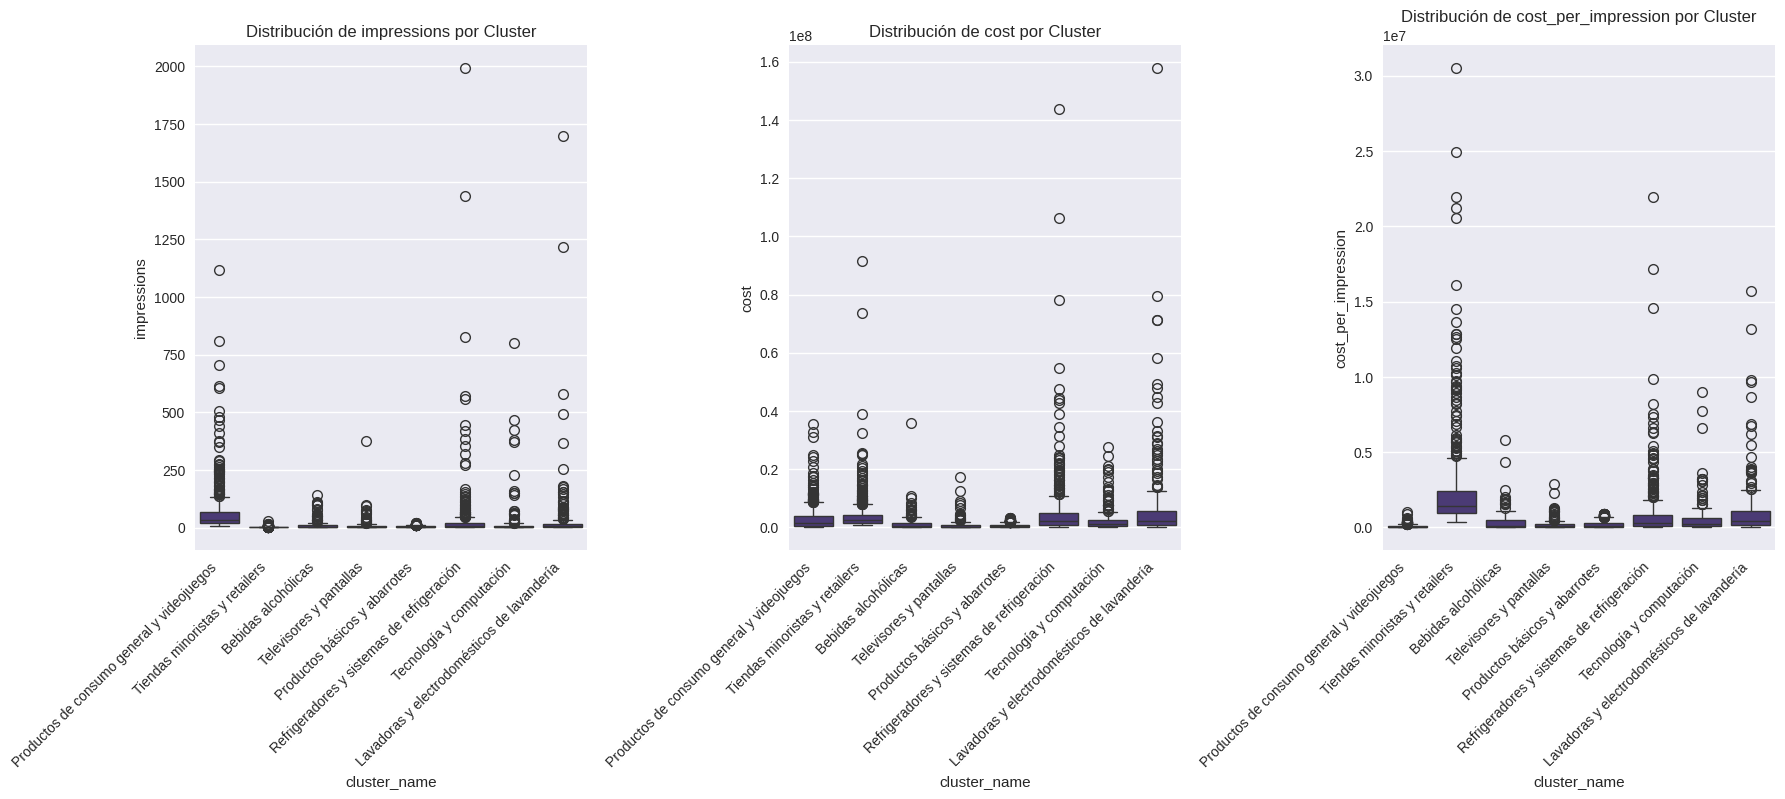

In [58]:
# 7. Análisis de Clusters
# ==================================================
print("\n# 7. Análisis de Clusters")
# Estadísticas por cluster para variables numéricas
cluster_stats = df.groupby('cluster_name')[numeric_features].agg(['mean', 'median', 'std', 'count'])
print("\nEstadísticas por cluster para variables numéricas:")
print(cluster_stats)
# Visualización de características numéricas por cluster
plt.figure(figsize=(18, 8))  # Aumenté un poco la altura
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    ax = sns.boxplot(x='cluster_name', y=feature, data=df)
    
    # Rotar las etiquetas del eje x y ajustar posición
    plt.xticks(rotation=45, ha='right')
    
    plt.title(f'Distribución de {feature} por Cluster')

# Ajustar layout después de crear todos los subplots
plt.tight_layout()
plt.savefig('numeric_features_by_cluster.png')
plt.show()

In [60]:
# 8. Análisis de términos de búsqueda por cluster
# ==================================================
print("\n# 8. Análisis de términos de búsqueda por cluster")
# Términos más frecuentes por cluster
top_terms_by_cluster = {}

# Opción 1: Usar los nombres descriptivos
for cluster_name in descriptive_names.values():
    cluster_terms = df[df['cluster_name'] == cluster_name]['search_term'].value_counts().head(10)
    top_terms_by_cluster[cluster_name] = cluster_terms

# Mostrar términos más frecuentes por cluster
print("\nTérminos de búsqueda más frecuentes por cluster:")
for cluster_name, terms in top_terms_by_cluster.items():
    print(f"\n{cluster_name} (Tamaño: {len(df[df['cluster_name'] == cluster_name])}):")
    print("-" * 50)
    for term, count in terms.items():
        print(f" - {term}: {count}")


# 8. Análisis de términos de búsqueda por cluster

Términos de búsqueda más frecuentes por cluster:

Productos básicos y abarrotes (Tamaño: 1782):
--------------------------------------------------
 - ofertas tienda: 4
 - suavitel tienda: 4
 - leche evaporada: 4
 - t bone: 3
 - estufa tienda: 3
 - jabon tienda: 3
 - switch lite: 3
 - crema ponds tienda: 3
 - barbie cutie reveal muñeca animales de la selva: 3
 - shampoo head and shoulders tienda: 3

Refrigeradores y sistemas de refrigeración (Tamaño: 404):
--------------------------------------------------
 - refrigerador: 10
 - refrigeradores: 10
 - refrigerador 14 pies: 8
 - refrigerador 11 pies: 6
 - refrigeradores en oferta: 5
 - tienda refrigeradores: 5
 - refrigerador walmart: 5
 - refrigeradores baratos: 5
 - refrigeradores walmart: 5
 - refrigeradores lg: 4

Tecnología y computación (Tamaño: 241):
--------------------------------------------------
 - laptop hp: 5
 - tablet: 3
 - laptop tienda: 3
 - laptop: 3
 - laptop hp 15: 2


In [62]:
# 9. Caracterización de Clusters
# ==================================================
print("\n# 9. Caracterización de Clusters")

# Calcular promedios globales para comparación
global_impressions_avg = df['impressions'].mean()
global_cost_avg = df['cost'].mean()
global_cost_per_impression_avg = df['cost_per_impression'].mean()

print("\nPromedios globales de todo el dataset:")
print("-" * 60)
print(f"Impresiones promedio global: {global_impressions_avg:.2f}")
print(f"Costo promedio global: {global_cost_avg:.2f}")
print(f"Costo por impresión promedio global: {global_cost_per_impression_avg:.2f}")

# Descripción detallada de cada cluster
print("\nDescripción detallada de cada cluster:")
for cluster_id, cluster_name in descriptive_names.items():
    cluster_data = df[df['cluster'] == cluster_id]
    print(f"\n{cluster_name} (Tamaño: {len(cluster_data)})")
    print("-" * 60)
    
    # Métricas numéricas con comparación porcentual con el promedio global
    imp_avg = cluster_data['impressions'].mean()
    cost_avg = cluster_data['cost'].mean()
    cpi_avg = cluster_data['cost_per_impression'].mean()
    
    imp_pct = (imp_avg / global_impressions_avg - 1) * 100
    cost_pct = (cost_avg / global_cost_avg - 1) * 100
    cpi_pct = (cpi_avg / global_cost_per_impression_avg - 1) * 100
    
    print(f"Impresiones promedio: {imp_avg:.2f} ({imp_pct:+.1f}% vs. promedio global)")
    print(f"Costo promedio: {cost_avg:.2f} ({cost_pct:+.1f}% vs. promedio global)")
    print(f"Costo por impresión: {cpi_avg:.2f} ({cpi_pct:+.1f}% vs. promedio global)")
    
    # Top 5 términos
    print(f"Top 5 términos de búsqueda más frecuentes:")
    top_terms = cluster_data['search_term'].value_counts().head(5)
    for term, count in top_terms.items():
        print(f" - {term}: {count}")


# 9. Caracterización de Clusters

Promedios globales de todo el dataset:
------------------------------------------------------------
Impresiones promedio global: 18.47
Costo promedio global: 2376264.78
Costo por impresión promedio global: 642578.41

Descripción detallada de cada cluster:

Productos básicos y abarrotes (Tamaño: 1782)
------------------------------------------------------------
Impresiones promedio: 3.78 (-79.5% vs. promedio global)
Costo promedio: 495325.48 (-79.2% vs. promedio global)
Costo por impresión: 188912.30 (-70.6% vs. promedio global)
Top 5 términos de búsqueda más frecuentes:
 - ofertas tienda: 4
 - suavitel tienda: 4
 - leche evaporada: 4
 - t bone: 3
 - estufa tienda: 3

Refrigeradores y sistemas de refrigeración (Tamaño: 404)
------------------------------------------------------------
Impresiones promedio: 35.77 (+93.6% vs. promedio global)
Costo promedio: 5378267.33 (+126.3% vs. promedio global)
Costo por impresión: 941474.49 (+46.5% vs. promedio globa


# 10. Evaluación adicional: coherencia semántica de clusters
Calculando coherencia semántica de los clusters...

Coherencia semántica por cluster (distancia promedio al centroide):
Lavadoras y electrodomésticos de lavandería: 2.1880
Refrigeradores y sistemas de refrigeración: 2.3572
Televisores y pantallas: 3.0583
Bebidas alcohólicas: 3.2876
Productos de consumo general y videojuegos: 3.3031
Productos básicos y abarrotes: 3.3555
Tiendas minoristas y retailers: 3.3883
Tecnología y computación: 3.7518


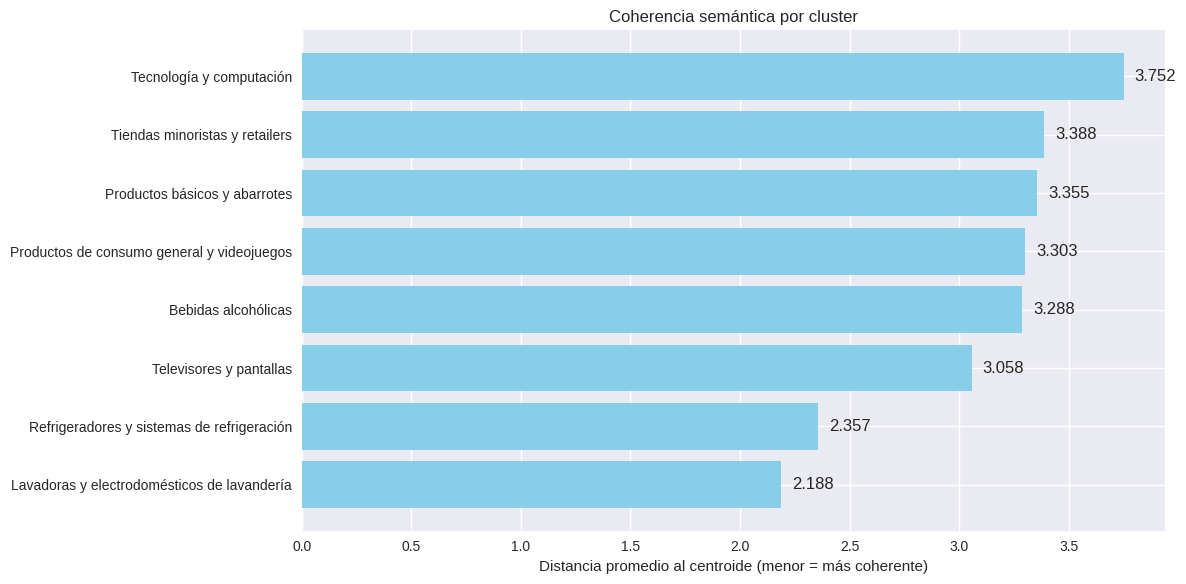

In [63]:
# 10. Evaluación adicional: coherencia semántica de clusters
# ==================================================
print("\n# 10. Evaluación adicional: coherencia semántica de clusters")
# Calcular distancia promedio de términos dentro de cada cluster a su centroide
if 'model' in locals():
    print("Calculando coherencia semántica de los clusters...")
    # Para cada cluster, calcular la distancia promedio de sus embeddings al centroide
    cluster_coherence = {}
    for cluster_id in range(optimal_k):
        # Obtener los términos de búsqueda únicos en este cluster
        cluster_terms = df[df['cluster'] == cluster_id]['search_term_clean'].unique()
        if len(cluster_terms) > 0:
            # Obtener embeddings de estos términos
            cluster_embeddings = np.array([term_to_embedding[term] for term in cluster_terms])
            # Calcular el centroide (vector promedio)
            centroid = np.mean(cluster_embeddings, axis=0)
            # Calcular distancias euclidianas al centroide
            distances = np.sqrt(np.sum((cluster_embeddings - centroid)**2, axis=1))
            # Guardar distancia promedio como medida de coherencia
            cluster_coherence[cluster_id] = np.mean(distances)
    
    # Mostrar resultados de coherencia (valores más bajos indican mayor coherencia)
    print("\nCoherencia semántica por cluster (distancia promedio al centroide):")
    # Ordenar por coherencia (de mayor a menor)
    sorted_coherence = sorted(cluster_coherence.items(), key=lambda x: x[1])
    
    for cluster_id, coherence in sorted_coherence:
        cluster_name = descriptive_names[cluster_id]
        print(f"{cluster_name}: {coherence:.4f}")
    
    # Opcionalmente: Visualización gráfica de la coherencia
    plt.figure(figsize=(12, 6))
    cluster_names = [descriptive_names[cluster_id] for cluster_id in cluster_coherence.keys()]
    coherence_values = list(cluster_coherence.values())
    
    # Ordenar para mejor visualización
    sorted_indices = np.argsort(coherence_values)
    sorted_names = [cluster_names[i] for i in sorted_indices]
    sorted_values = [coherence_values[i] for i in sorted_indices]
    
    bars = plt.barh(sorted_names, sorted_values, color='skyblue')
    
    # Añadir valores numéricos al final de cada barra
    for i, v in enumerate(sorted_values):
        plt.text(v + 0.05, i, f"{v:.3f}", va='center')
    
    plt.xlabel('Distancia promedio al centroide (menor = más coherente)')
    plt.title('Coherencia semántica por cluster')
    plt.tight_layout()
    plt.savefig('cluster_coherence.png')
    plt.show()

In [64]:
# 11. Preparación para guardar en la base de datos
# ==================================================
print("\n# 11. Preparación para guardar en la base de datos")

# Crear DataFrame para guardar en la tabla 'clusters'
clusters_df = df[['id', 'search_term', 'cluster', 'cluster_name']].copy()
print("\nDatos que se guardarán en la tabla 'clusters':")
print(clusters_df.head())

# Guardar resultados para su uso posterior
clusters_df.to_csv('semantic_clusters_results.csv', index=False)
print("\nResultados de clustering semántico guardados en 'semantic_clusters_results.csv'")

# Guardar modelo para uso futuro
joblib.dump(kmeans, 'kmeans_model.pkl')
print("\nModelo de clustering guardado en 'kmeans_model.pkl'")

# Guardar también el diccionario de nombres de clusters para uso futuro
joblib.dump(descriptive_names, 'cluster_names.pkl')
print("\nNombres de clusters guardados en 'cluster_names.pkl'")

print("\n# Conclusiones")
print("""
Se ha completado el análisis de clustering incorporando tanto variables numéricas
como la semántica de los términos de búsqueda. Este enfoque enriquecido permite
identificar patrones más significativos y accionables para estrategias de marketing
y optimización de campañas publicitarias.

Puntos clave del análisis:
1. Se ha utilizado SentenceTransformer para capturar la semántica de los términos
   de búsqueda, lo que permite agrupar términos similares en significado.
2. La combinación de características numéricas (impresiones, costo) con
   características semánticas permite identificar grupos de términos con
   comportamiento similar.
3. El número óptimo de clusters se determinó mediante el análisis del coeficiente
   de silueta y se identificaron 7 grupos distintos.
4. Se han asignado nombres descriptivos a cada cluster que reflejan su contenido
   semántico, facilitando la interpretación y aplicación de los resultados.
5. Se ha evaluado la coherencia semántica de cada cluster, identificando aquellos
   con mayor homogeneidad interna.

El siguiente paso recomendado es implementar estrategias de marketing específicas
para cada cluster identificado, aprovechando sus características particulares:
- Optimizar presupuestos para clusters de bajo rendimiento
- Potenciar inversión en clusters eficientes
- Desarrollar mensajes publicitarios adaptados a cada grupo semántico
""")


# 11. Preparación para guardar en la base de datos

Datos que se guardarán en la tabla 'clusters':
     id                  search_term  cluster  \
0  2379                   jabon dove        6   
1   977  desodorante secret clinical        4   
2  6329                bacardi limon        5   
3  2044         pantalla 40 pulgadas        7   
4  2542                     seagrams        0   

                                 cluster_name  
0  Productos de consumo general y videojuegos  
1              Tiendas minoristas y retailers  
2                         Bebidas alcohólicas  
3                     Televisores y pantallas  
4               Productos básicos y abarrotes  

Resultados de clustering semántico guardados en 'semantic_clusters_results.csv'

Modelo de clustering guardado en 'kmeans_model.pkl'

Nombres de clusters guardados en 'cluster_names.pkl'

# Conclusiones

Se ha completado el análisis de clustering incorporando tanto variables numéricas
como la semántica de los térmi

## Codigo completo usando agrupacion Semantica

Cargando datos...
Dataset cargado: 4313 filas, 6 columnas

# 1. Exploración Inicial y Preprocesamiento
Limpiando términos de búsqueda...
Número de términos de búsqueda únicos: 3485

# 2. Procesamiento de datos numéricos
Datos numéricos preprocesados y escalados

# 3. Procesamiento de datos textuales con Sentence Transformers
Procesando 3485 términos de búsqueda únicos...
Cargando modelo de embeddings...
Modelo de embeddings cargado correctamente
Generando embeddings con Sentence Transformers...


Batches:   0%|          | 0/109 [00:00<?, ?it/s]


# 3.1 Determinación de dimensionalidad óptima para PCA


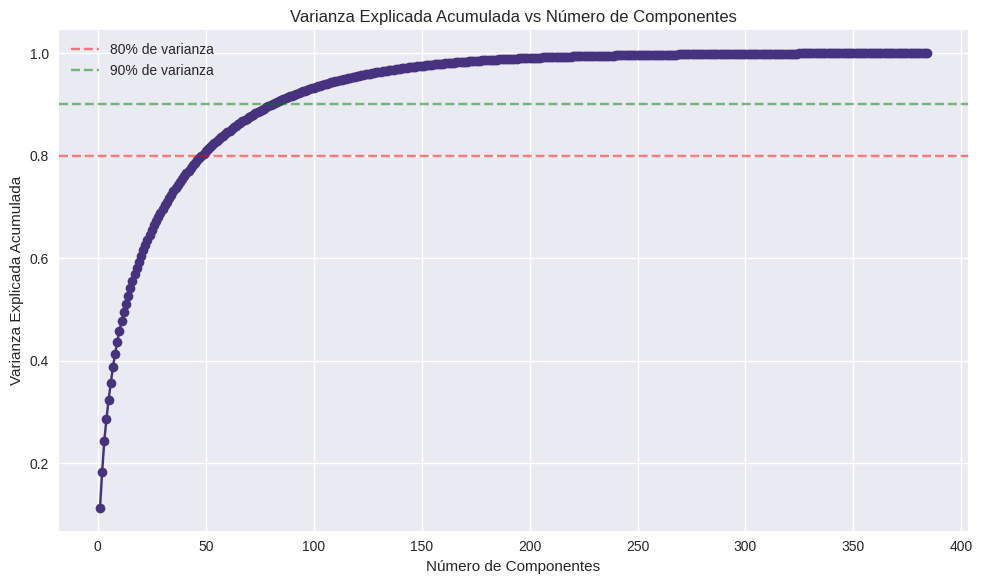

Componentes necesarios para explicar el 80% de varianza: 49
Componentes necesarios para explicar el 90% de varianza: 81
Componentes necesarios para explicar el 95% de varianza: 115

Dimensionalidad óptima seleccionada: 49 componentes

# 3.2 Aplicación de PCA con dimensionalidad óptima
Varianza explicada con 49 componentes: 0.8041
Dimensionalidad reducida a 49 características

# 4. Combinar características numéricas y textuales
Matriz combinada para clustering: (4313, 52)

# 5. Determinación del número óptimo de clusters
Evaluando k=2...
Evaluando k=3...
Evaluando k=4...
Evaluando k=5...
Evaluando k=6...
Evaluando k=7...
Evaluando k=8...
Evaluando k=9...
Evaluando k=10...


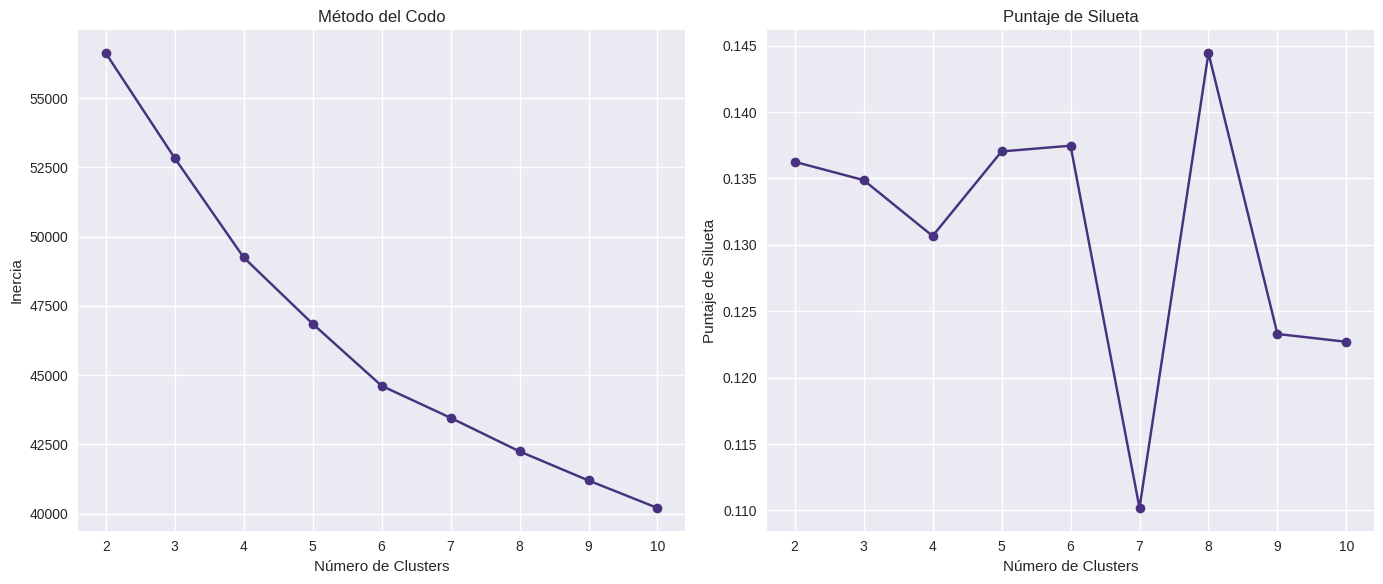

Número óptimo de clusters basado en silueta: 8

# 6. Aplicación del Algoritmo de Clustering (K=8)
Generando visualización t-SNE para los clusters...


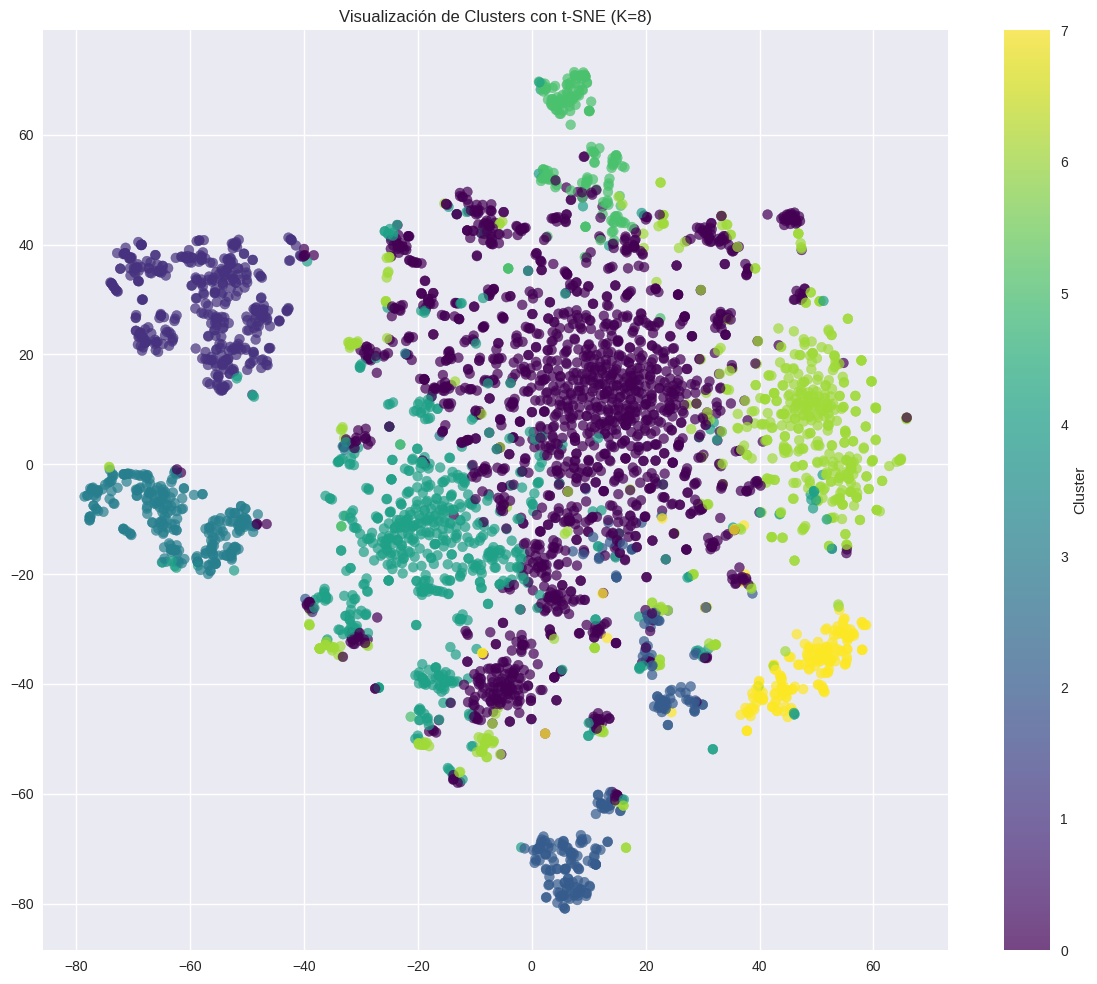


# 6.1 Renombrar clusters con nombres significativos

Resumen de clusters con nombres descriptivos:

Productos básicos y abarrotes (Cluster 0, Tamaño: 1782)
------------------------------------------------------------
Impresiones promedio: 3.78
Costo promedio: 495325.48
Costo por impresión promedio: 188912.30
Top 5 términos representativos:
 - ofertas tienda: 4
 - suavitel tienda: 4
 - leche evaporada: 4
 - t bone: 3
 - estufa tienda: 3

Refrigeradores y sistemas de refrigeración (Cluster 1, Tamaño: 404)
------------------------------------------------------------
Impresiones promedio: 35.77
Costo promedio: 5378267.33
Costo por impresión promedio: 941474.49
Top 5 términos representativos:
 - refrigerador: 10
 - refrigeradores: 10
 - refrigerador 14 pies: 8
 - refrigerador 11 pies: 6
 - refrigeradores en oferta: 5

Tecnología y computación (Cluster 2, Tamaño: 241)
------------------------------------------------------------
Impresiones promedio: 20.66
Costo promedio: 2470829.88
Costo po

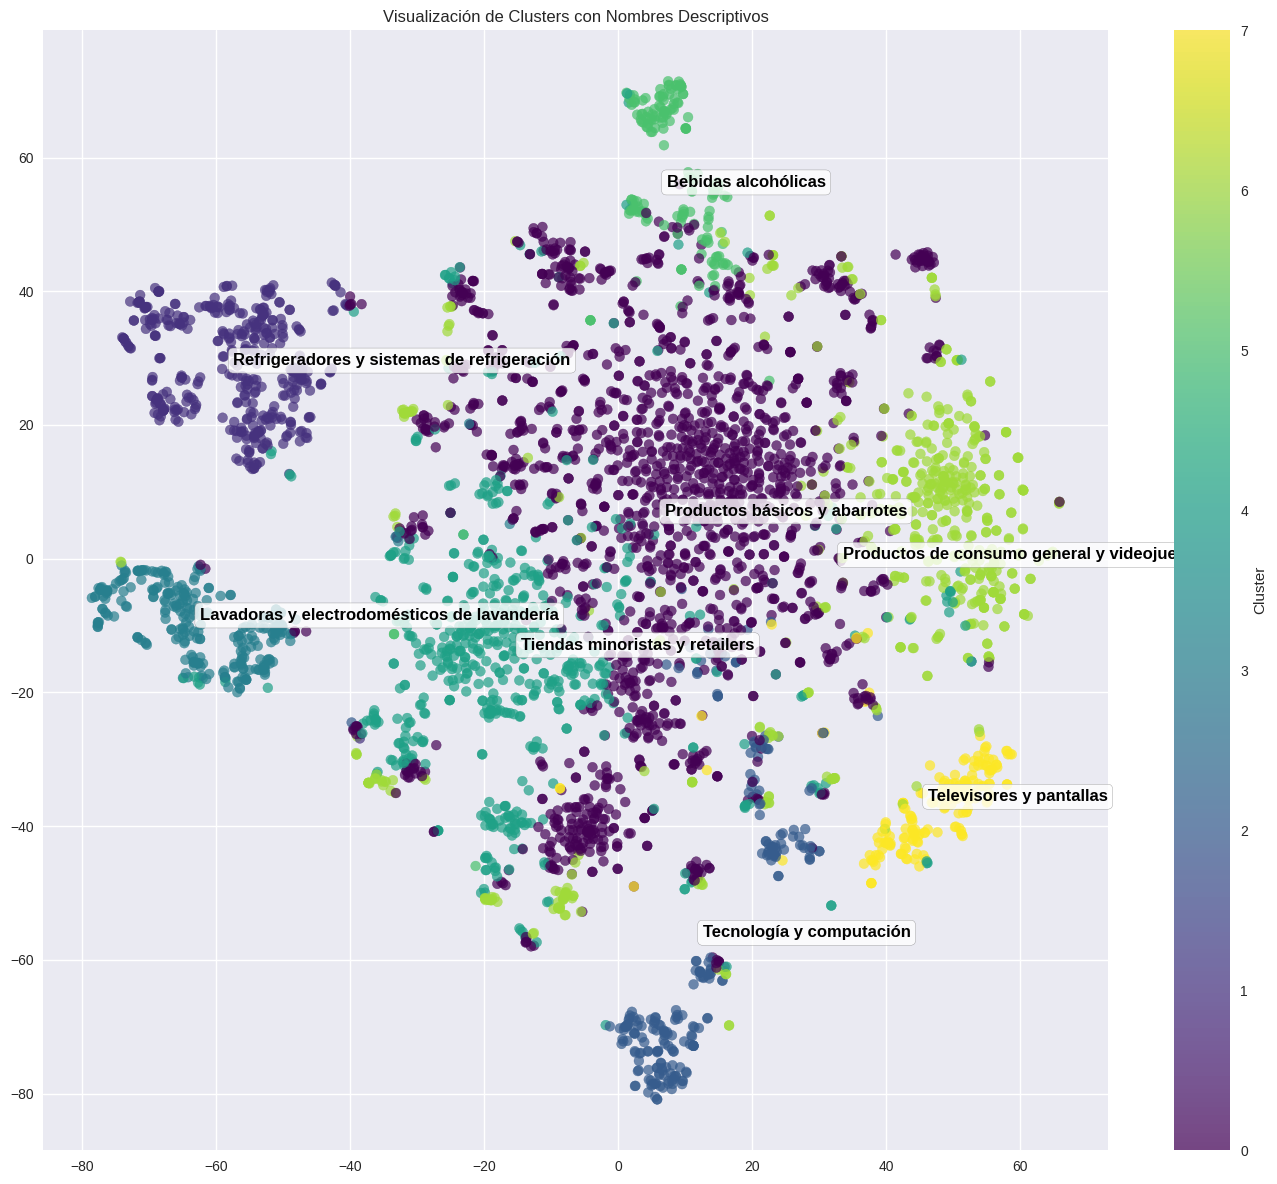


# 7. Análisis de Clusters

Estadísticas por cluster para variables numéricas:
                                            impressions                     \
                                                   mean median         std   
cluster_name                                                                 
Bebidas alcohólicas                           12.625000    4.0   23.374506   
Lavadoras y electrodomésticos de lavandería   33.461538    5.0  138.148416   
Productos básicos y abarrotes                  3.779461    2.0    3.398676   
Productos de consumo general y videojuegos    64.001653   34.0   94.589712   
Refrigeradores y sistemas de refrigeración    35.767327    6.0  142.164063   
Tecnología y computación                      20.663900    3.0   76.420050   
Televisores y pantallas                       10.751323    3.0   30.929511   
Tiendas minoristas y retailers                 2.285714    1.0    2.517281   

                                                           cos

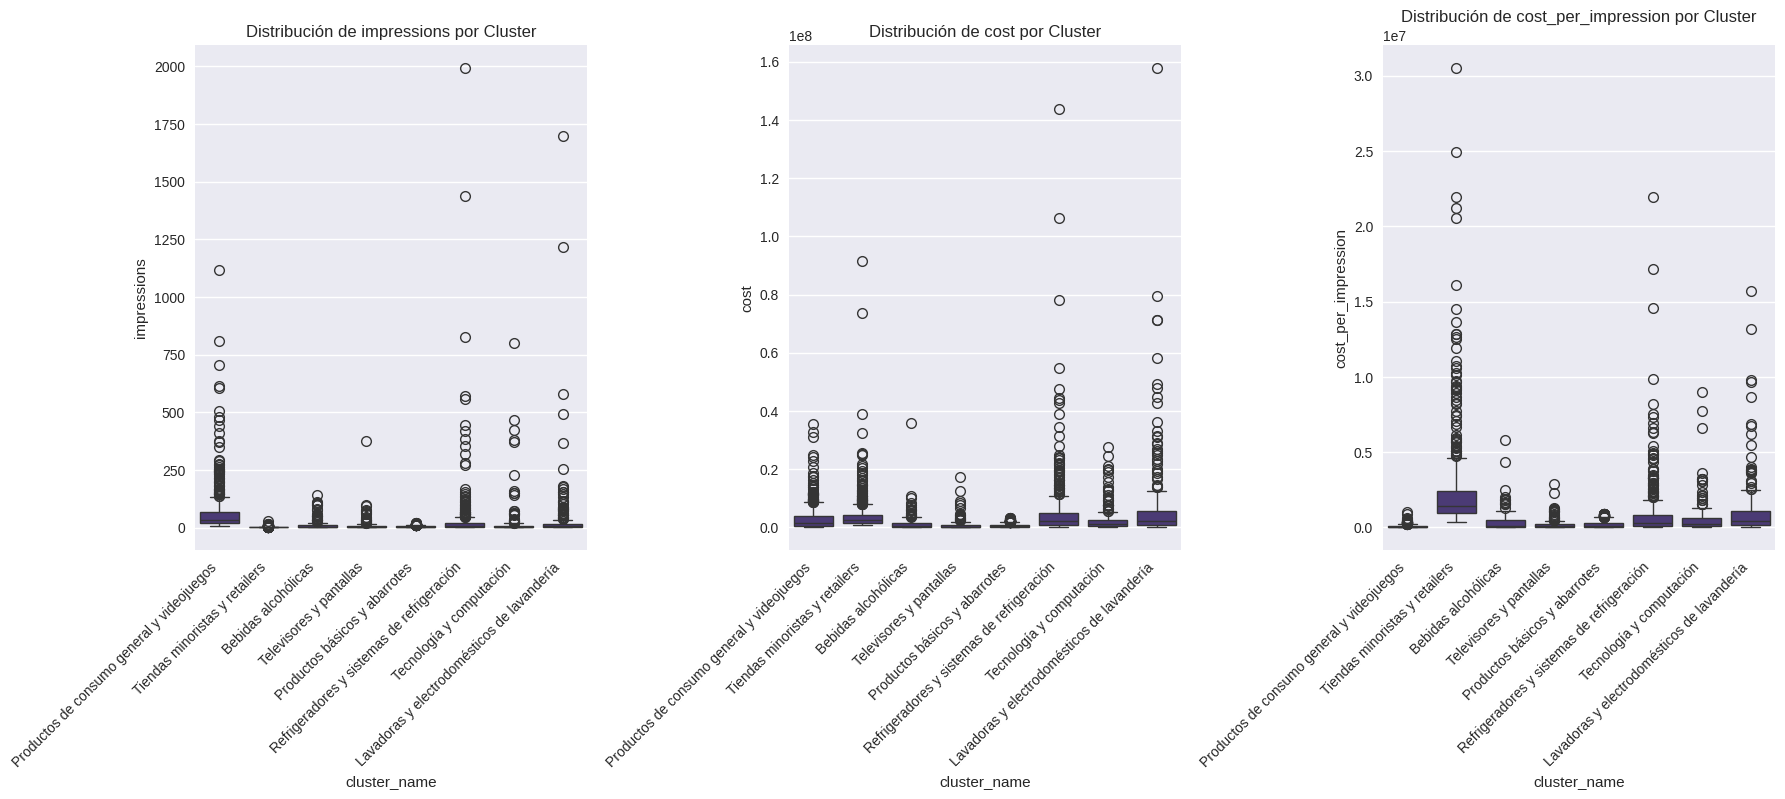


# 8. Análisis de términos de búsqueda por cluster

Términos de búsqueda más frecuentes por cluster:

Productos básicos y abarrotes (Tamaño: 1782):
--------------------------------------------------
 - ofertas tienda: 4
 - suavitel tienda: 4
 - leche evaporada: 4
 - t bone: 3
 - estufa tienda: 3
 - jabon tienda: 3
 - switch lite: 3
 - crema ponds tienda: 3
 - barbie cutie reveal muñeca animales de la selva: 3
 - shampoo head and shoulders tienda: 3

Refrigeradores y sistemas de refrigeración (Tamaño: 404):
--------------------------------------------------
 - refrigerador: 10
 - refrigeradores: 10
 - refrigerador 14 pies: 8
 - refrigerador 11 pies: 6
 - refrigeradores en oferta: 5
 - tienda refrigeradores: 5
 - refrigerador walmart: 5
 - refrigeradores baratos: 5
 - refrigeradores walmart: 5
 - refrigeradores lg: 4

Tecnología y computación (Tamaño: 241):
--------------------------------------------------
 - laptop hp: 5
 - tablet: 3
 - laptop tienda: 3
 - laptop: 3
 - laptop hp 15: 2


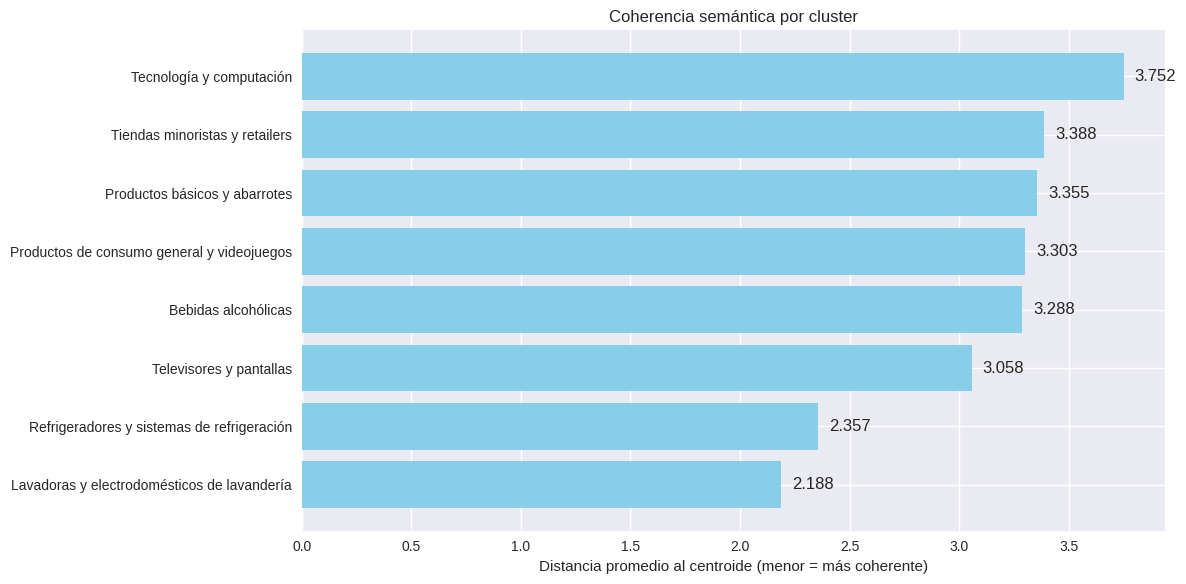


# 11. Preparación para guardar en la base de datos

Datos que se guardarán en la tabla 'clusters':
     id                  search_term  cluster  \
0  2379                   jabon dove        6   
1   977  desodorante secret clinical        4   
2  6329                bacardi limon        5   
3  2044         pantalla 40 pulgadas        7   
4  2542                     seagrams        0   

                                 cluster_name  
0  Productos de consumo general y videojuegos  
1              Tiendas minoristas y retailers  
2                         Bebidas alcohólicas  
3                     Televisores y pantallas  
4               Productos básicos y abarrotes  

Resultados de clustering semántico guardados en 'semantic_clusters_results.csv'

Modelo de clustering guardado en 'kmeans_model.pkl'

Nombres de clusters guardados en 'cluster_names.pkl'

# Conclusiones

Se ha completado el análisis de clustering incorporando tanto variables numéricas
como la semántica de los térmi

In [65]:
# Análisis de Clustering con Semántica de Términos de Búsqueda
# ==================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
import warnings
from nltk.corpus import stopwords
import nltk
import re
import joblib
from sentence_transformers import SentenceTransformer

# Configuraciones para visualización
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 12

# Descargar stopwords en español
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Cargar los datos extraídos
print("Cargando datos...")
df = pd.read_csv('data_5555555555.csv')
print(f"Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")

# 1. Exploración Inicial y Preprocesamiento
# ==================================================
print("\n# 1. Exploración Inicial y Preprocesamiento")

# Limpiar términos de búsqueda: quitar caracteres especiales y convertir a minúsculas
print("Limpiando términos de búsqueda...")
df['search_term_clean'] = df['search_term'].apply(lambda x: re.sub(r'[^\w\s]', ' ', str(x).lower()))

# Calcular costo por impresión
df['cost_per_impression'] = df['cost'] / df['impressions']
df.loc[df['impressions'] == 0, 'cost_per_impression'] = 0  # Manejar divisiones por cero

# Mostrar número de términos de búsqueda únicos
unique_terms = df['search_term'].nunique()
print(f"Número de términos de búsqueda únicos: {unique_terms}")

# 2. Procesamiento de datos numéricos
# ==================================================
print("\n# 2. Procesamiento de datos numéricos")

# Seleccionar variables numéricas para análisis
numeric_features = ['impressions', 'cost', 'cost_per_impression']
X_numeric = df[numeric_features].copy()

# Manejar valores extremos (outliers)
for feature in numeric_features:
    Q1 = X_numeric[feature].quantile(0.25)
    Q3 = X_numeric[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_numeric[feature] = X_numeric[feature].clip(lower_bound, upper_bound)

# Escalar características numéricas
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)
print("Datos numéricos preprocesados y escalados")

# 3. Procesamiento de datos textuales con Sentence Transformers
# ==================================================
print("\n# 3. Procesamiento de datos textuales con Sentence Transformers")
# Crear lista única de términos de búsqueda para procesar
unique_search_terms = df['search_term_clean'].unique()
print(f"Procesando {len(unique_search_terms)} términos de búsqueda únicos...")

# Cargar modelo de embeddings multilingüe
print("Cargando modelo de embeddings...")
try:
    model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
    print("Modelo de embeddings cargado correctamente")
    
    # Generar embeddings para términos únicos
    print("Generando embeddings con Sentence Transformers...")
    term_embeddings = model.encode(unique_search_terms, show_progress_bar=True)
    
    # Crear diccionario para mapear términos a embeddings
    term_to_embedding = dict(zip(unique_search_terms, term_embeddings))
    
    # Asignar embeddings a cada fila del dataframe
    search_term_embeddings = np.array([term_to_embedding[term] for term in df['search_term_clean']])
    
    # PASO INTERMEDIO: Determinar dimensionalidad óptima para PCA
    print("\n# 3.1 Determinación de dimensionalidad óptima para PCA")
    
    # Aplicar PCA sin limitar componentes para análisis
    pca_analysis = PCA(random_state=42)
    pca_analysis.fit(search_term_embeddings)
    
    # Calcular varianza explicada acumulativa
    cumulative_variance = np.cumsum(pca_analysis.explained_variance_ratio_)
    
    # Graficar curva de varianza explicada
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
    plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.5, label='80% de varianza')
    plt.axhline(y=0.9, color='g', linestyle='--', alpha=0.5, label='90% de varianza')
    plt.title('Varianza Explicada Acumulada vs Número de Componentes')
    plt.xlabel('Número de Componentes')
    plt.ylabel('Varianza Explicada Acumulada')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig('pca_variance_analysis.png')
    plt.show()
    
    # Determinar número de componentes para diferentes umbrales de varianza
    threshold_80 = np.argmax(cumulative_variance >= 0.8) + 1
    threshold_90 = np.argmax(cumulative_variance >= 0.9) + 1
    threshold_95 = np.argmax(cumulative_variance >= 0.95) + 1
    
    print(f"Componentes necesarios para explicar el 80% de varianza: {threshold_80}")
    print(f"Componentes necesarios para explicar el 90% de varianza: {threshold_90}")
    print(f"Componentes necesarios para explicar el 95% de varianza: {threshold_95}")
    
    # Seleccionar dimensionalidad basada en un umbral de varianza explicada
    optimal_components = threshold_80
    print(f"\nDimensionalidad óptima seleccionada: {optimal_components} componentes")
    
    # Continuar con PCA usando la dimensionalidad óptima
    print("\n# 3.2 Aplicación de PCA con dimensionalidad óptima")
    pca_text = PCA(n_components=optimal_components, random_state=42)
    text_features_reduced = pca_text.fit_transform(search_term_embeddings)
    print(f"Varianza explicada con {optimal_components} componentes: {np.sum(pca_text.explained_variance_ratio_):.4f}")
    
except Exception as e:
    print(f"Error al usar Sentence Transformers: {e}")
    print("Usando enfoque alternativo con TF-IDF")
    
    # Usar TF-IDF como alternativa si falla Sentence Transformers
    tfidf = TfidfVectorizer(max_features=100, stop_words=stopwords.words('spanish') + stopwords.words('english'))
    tfidf_matrix = tfidf.fit_transform(df['search_term_clean'])
    
    # Reducir dimensionalidad con PCA para TF-IDF
    pca_text = PCA(n_components=40, random_state=42)
    text_features_reduced = pca_text.fit_transform(tfidf_matrix.toarray())
    print(f"Varianza explicada por los componentes de PCA con TF-IDF: {np.sum(pca_text.explained_variance_ratio_):.2f}")

print(f"Dimensionalidad reducida a {text_features_reduced.shape[1]} características")

# 4. Combinar características numéricas y textuales
# ==================================================
print("\n# 4. Combinar características numéricas y textuales")

# Combinar características para clustering
X_combined = np.hstack((X_numeric_scaled, text_features_reduced))
print(f"Matriz combinada para clustering: {X_combined.shape}")

# 5. Determinación del número óptimo de clusters
# ==================================================
print("\n# 5. Determinación del número óptimo de clusters")

# Método del codo (Elbow Method) y silueta
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    print(f"Evaluando k={k}...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_combined)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_combined, kmeans.labels_))

# Graficar método del codo
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)

# Graficar puntaje de silueta
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-')
plt.title('Puntaje de Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje de Silueta')
plt.grid(True)
plt.tight_layout()
plt.savefig('optimal_clusters.png')
plt.show()

# Determinar el número óptimo de clusters
best_k_index = np.argmax(silhouette_scores)
optimal_k = k_range[best_k_index]
print(f"Número óptimo de clusters basado en silueta: {optimal_k}")


# 6. Aplicación del Algoritmo de Clustering (KMeans)
# ==================================================
print(f"\n# 6. Aplicación del Algoritmo de Clustering (K={optimal_k})")

# Aplicar KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_combined)

# Visualizar los clusters con t-SNE para mejor separación visual
print("Generando visualización t-SNE para los clusters...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_combined)

# Crear gráfico de dispersión
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'], cmap='viridis', alpha=0.7, s=50)
plt.title(f'Visualización de Clusters con t-SNE (K={optimal_k})')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.savefig('clusters_tsne.png')
plt.show()

# 6.1 Renombrar clusters con nombres significativos
# ==================================================
print("\n# 6.1 Renombrar clusters con nombres significativos")

# Asignar nombres descriptivos basados en el análisis manual de los términos frecuentes
descriptive_names = {
    0: "Productos básicos y abarrotes",
    1: "Refrigeradores y sistemas de refrigeración",
    2: "Tecnología y computación",
    3: "Lavadoras y electrodomésticos de lavandería",
    4: "Tiendas minoristas y retailers",
    5: "Bebidas alcohólicas",
    6: "Productos de consumo general y videojuegos",
    7: "Televisores y pantallas"
}

# Aplicar nombres descriptivos al dataframe
df['cluster_name'] = df['cluster'].map(descriptive_names)

# Mostrar resumen con nombres descriptivos
print("\nResumen de clusters con nombres descriptivos:")
for cluster_id, name in descriptive_names.items():
    cluster_data = df[df['cluster'] == cluster_id]
    print(f"\n{name} (Cluster {cluster_id}, Tamaño: {len(cluster_data)})")
    print("-" * 60)
    print(f"Impresiones promedio: {cluster_data['impressions'].mean():.2f}")
    print(f"Costo promedio: {cluster_data['cost'].mean():.2f}")
    print(f"Costo por impresión promedio: {cluster_data['cost_per_impression'].mean():.2f}")
    print(f"Top 5 términos representativos:")
    for term, count in cluster_data['search_term'].value_counts().head(5).items():
        print(f" - {term}: {count}")

# Visualizar los clusters con nombres descriptivos (t-SNE)
plt.figure(figsize=(14, 12))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'], cmap='viridis', alpha=0.7, s=50)

# Añadir etiquetas con los nombres de los clusters
for cluster_id, name in descriptive_names.items():
    # Encontrar el centro del cluster en el espacio t-SNE
    cluster_points = X_tsne[df['cluster'] == cluster_id]
    if len(cluster_points) > 0:  # Verificar que el cluster tenga puntos
        centroid = cluster_points.mean(axis=0)
        # Añadir etiqueta
        plt.annotate(name, xy=centroid, xytext=(centroid[0], centroid[1]),
                    fontsize=12, weight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", fc='white', ec="gray", alpha=0.8))

plt.title('Visualización de Clusters con Nombres Descriptivos')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.savefig('clusters_named_tsne.png')
plt.show()

# Actualizar etiquetas de cluster para guardar en BD
cluster_labels = descriptive_names

# 7. Análisis de Clusters
# ==================================================
print("\n# 7. Análisis de Clusters")
# Estadísticas por cluster para variables numéricas
cluster_stats = df.groupby('cluster_name')[numeric_features].agg(['mean', 'median', 'std', 'count'])
print("\nEstadísticas por cluster para variables numéricas:")
print(cluster_stats)
# Visualización de características numéricas por cluster
plt.figure(figsize=(18, 8))  # Aumenté un poco la altura
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    ax = sns.boxplot(x='cluster_name', y=feature, data=df)
    
    # Rotar las etiquetas del eje x y ajustar posición
    plt.xticks(rotation=45, ha='right')
    
    plt.title(f'Distribución de {feature} por Cluster')

# Ajustar layout después de crear todos los subplots
plt.tight_layout()
plt.savefig('numeric_features_by_cluster.png')
plt.show()

# 8. Análisis de términos de búsqueda por cluster
# ==================================================
print("\n# 8. Análisis de términos de búsqueda por cluster")
# Términos más frecuentes por cluster
top_terms_by_cluster = {}

# Opción 1: Usar los nombres descriptivos
for cluster_name in descriptive_names.values():
    cluster_terms = df[df['cluster_name'] == cluster_name]['search_term'].value_counts().head(10)
    top_terms_by_cluster[cluster_name] = cluster_terms

# Mostrar términos más frecuentes por cluster
print("\nTérminos de búsqueda más frecuentes por cluster:")
for cluster_name, terms in top_terms_by_cluster.items():
    print(f"\n{cluster_name} (Tamaño: {len(df[df['cluster_name'] == cluster_name])}):")
    print("-" * 50)
    for term, count in terms.items():
        print(f" - {term}: {count}")

# 9. Caracterización de Clusters
# ==================================================
print("\n# 9. Caracterización de Clusters")

# Calcular promedios globales para comparación
global_impressions_avg = df['impressions'].mean()
global_cost_avg = df['cost'].mean()
global_cost_per_impression_avg = df['cost_per_impression'].mean()

print("\nPromedios globales de todo el dataset:")
print("-" * 60)
print(f"Impresiones promedio global: {global_impressions_avg:.2f}")
print(f"Costo promedio global: {global_cost_avg:.2f}")
print(f"Costo por impresión promedio global: {global_cost_per_impression_avg:.2f}")

# Descripción detallada de cada cluster
print("\nDescripción detallada de cada cluster:")
for cluster_id, cluster_name in descriptive_names.items():
    cluster_data = df[df['cluster'] == cluster_id]
    print(f"\n{cluster_name} (Tamaño: {len(cluster_data)})")
    print("-" * 60)
    
    # Métricas numéricas con comparación porcentual con el promedio global
    imp_avg = cluster_data['impressions'].mean()
    cost_avg = cluster_data['cost'].mean()
    cpi_avg = cluster_data['cost_per_impression'].mean()
    
    imp_pct = (imp_avg / global_impressions_avg - 1) * 100
    cost_pct = (cost_avg / global_cost_avg - 1) * 100
    cpi_pct = (cpi_avg / global_cost_per_impression_avg - 1) * 100
    
    print(f"Impresiones promedio: {imp_avg:.2f} ({imp_pct:+.1f}% vs. promedio global)")
    print(f"Costo promedio: {cost_avg:.2f} ({cost_pct:+.1f}% vs. promedio global)")
    print(f"Costo por impresión: {cpi_avg:.2f} ({cpi_pct:+.1f}% vs. promedio global)")
    
    # Top 5 términos
    print(f"Top 5 términos de búsqueda más frecuentes:")
    top_terms = cluster_data['search_term'].value_counts().head(5)
    for term, count in top_terms.items():
        print(f" - {term}: {count}")
        
# 10. Evaluación adicional: coherencia semántica de clusters
# ==================================================
print("\n# 10. Evaluación adicional: coherencia semántica de clusters")
# Calcular distancia promedio de términos dentro de cada cluster a su centroide
if 'model' in locals():
    print("Calculando coherencia semántica de los clusters...")
    # Para cada cluster, calcular la distancia promedio de sus embeddings al centroide
    cluster_coherence = {}
    for cluster_id in range(optimal_k):
        # Obtener los términos de búsqueda únicos en este cluster
        cluster_terms = df[df['cluster'] == cluster_id]['search_term_clean'].unique()
        if len(cluster_terms) > 0:
            # Obtener embeddings de estos términos
            cluster_embeddings = np.array([term_to_embedding[term] for term in cluster_terms])
            # Calcular el centroide (vector promedio)
            centroid = np.mean(cluster_embeddings, axis=0)
            # Calcular distancias euclidianas al centroide
            distances = np.sqrt(np.sum((cluster_embeddings - centroid)**2, axis=1))
            # Guardar distancia promedio como medida de coherencia
            cluster_coherence[cluster_id] = np.mean(distances)
    
    # Mostrar resultados de coherencia (valores más bajos indican mayor coherencia)
    print("\nCoherencia semántica por cluster (distancia promedio al centroide):")
    # Ordenar por coherencia (de mayor a menor)
    sorted_coherence = sorted(cluster_coherence.items(), key=lambda x: x[1])
    
    for cluster_id, coherence in sorted_coherence:
        cluster_name = descriptive_names[cluster_id]
        print(f"{cluster_name}: {coherence:.4f}")
    
    # Opcionalmente: Visualización gráfica de la coherencia
    plt.figure(figsize=(12, 6))
    cluster_names = [descriptive_names[cluster_id] for cluster_id in cluster_coherence.keys()]
    coherence_values = list(cluster_coherence.values())
    
    # Ordenar para mejor visualización
    sorted_indices = np.argsort(coherence_values)
    sorted_names = [cluster_names[i] for i in sorted_indices]
    sorted_values = [coherence_values[i] for i in sorted_indices]
    
    bars = plt.barh(sorted_names, sorted_values, color='skyblue')
    
    # Añadir valores numéricos al final de cada barra
    for i, v in enumerate(sorted_values):
        plt.text(v + 0.05, i, f"{v:.3f}", va='center')
    
    plt.xlabel('Distancia promedio al centroide (menor = más coherente)')
    plt.title('Coherencia semántica por cluster')
    plt.tight_layout()
    plt.savefig('cluster_coherence.png')
    plt.show()

# 11. Preparación para guardar en la base de datos
# ==================================================
print("\n# 11. Preparación para guardar en la base de datos")

# Ya no necesitamos esta línea porque ya tenemos cluster_name
# df['cluster_label'] = df['cluster'].map(cluster_labels)

# Crear DataFrame para guardar en la tabla 'clusters'
clusters_df = df[['id', 'search_term', 'cluster', 'cluster_name']].copy()
print("\nDatos que se guardarán en la tabla 'clusters':")
print(clusters_df.head())

# Guardar resultados para su uso posterior
clusters_df.to_csv('semantic_clusters_results.csv', index=False)
print("\nResultados de clustering semántico guardados en 'semantic_clusters_results.csv'")

# Guardar modelo para uso futuro
joblib.dump(kmeans, 'kmeans_model.pkl')
print("\nModelo de clustering guardado en 'kmeans_model.pkl'")

# Guardar también el diccionario de nombres de clusters para uso futuro
joblib.dump(descriptive_names, 'cluster_names.pkl')
print("\nNombres de clusters guardados en 'cluster_names.pkl'")

print("\n# Conclusiones")
print("""
Se ha completado el análisis de clustering incorporando tanto variables numéricas
como la semántica de los términos de búsqueda. Este enfoque enriquecido permite
identificar patrones más significativos y accionables para estrategias de marketing
y optimización de campañas publicitarias.

Puntos clave del análisis:
1. Se ha utilizado SentenceTransformer para capturar la semántica de los términos
   de búsqueda, lo que permite agrupar términos similares en significado.
2. La combinación de características numéricas (impresiones, costo) con
   características semánticas permite identificar grupos de términos con
   comportamiento similar.
3. El número óptimo de clusters se determinó mediante el análisis del coeficiente
   de silueta y se identificaron 7 grupos distintos.
4. Se han asignado nombres descriptivos a cada cluster que reflejan su contenido
   semántico, facilitando la interpretación y aplicación de los resultados.
5. Se ha evaluado la coherencia semántica de cada cluster, identificando aquellos
   con mayor homogeneidad interna.

El siguiente paso recomendado es implementar estrategias de marketing específicas
para cada cluster identificado, aprovechando sus características particulares:
- Optimizar presupuestos para clusters de bajo rendimiento
- Potenciar inversión en clusters eficientes
- Desarrollar mensajes publicitarios adaptados a cada grupo semántico
""")

## Codigo Completo sin usar agrupacion Semantica

In [ ]:
# Análisis Exploratorio de Datos y Clustering
# ==================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

# Configuraciones para visualización
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Cargar los datos extraídos
df = pd.read_csv('data_5555555555.csv')

# 1. Exploración Inicial
# ==================================================
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras 5 filas del dataset:")
display(df.head())

print("\nInformación del dataset:")
display(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe())

print("\nVerificar valores nulos por columna:")
display(df.isnull().sum())

# 2. Análisis Univariante
# ==================================================
print("\n# Análisis Univariante")

# Distribución de impresiones
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['impressions'], bins=30, kde=True)
plt.title('Distribución de Impresiones')
plt.xlabel('Impresiones')
plt.ylabel('Frecuencia')

# Distribución de costos
plt.subplot(1, 2, 2)
sns.histplot(df['cost'], bins=30, kde=True)
plt.title('Distribución de Costos')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Estadísticas descriptivas por percentiles
print("\nEstadísticas detalladas de impresiones:")
display(df['impressions'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

print("\nEstadísticas detalladas de costos:")
display(df['cost'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

# 3. Relación entre Variables
# ==================================================
print("\n# Relación entre Variables")

# Calcular nuevas métricas para el análisis
df['cost_per_impression'] = df['cost'] / df['impressions']
df.loc[df['impressions'] == 0, 'cost_per_impression'] = 0  # Manejar divisiones por cero

# Gráfico de dispersión entre impresiones y costo
plt.figure(figsize=(12, 8))
plt.scatter(df['impressions'], df['cost'], alpha=0.5)
plt.title('Relación entre Impresiones y Costo')
plt.xlabel('Impresiones')
plt.ylabel('Costo')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Matriz de correlación
correlation_matrix = df[['impressions', 'cost', 'cost_per_impression']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

# 4. Preparación para Clustering
# ==================================================
print("\n# Preparación para Clustering")

# Seleccionar variables para clustering
features = ['impressions', 'cost', 'cost_per_impression']
X = df[features].copy()

# Manejar valores extremos (outliers)
print("\nEstadísticas antes de tratar outliers:")
display(X.describe())

# Detectar y limitar outliers usando el método IQR
for feature in features:
    Q1 = X[feature].quantile(0.25)
    Q3 = X[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X[feature] = X[feature].clip(lower_bound, upper_bound)

print("\nEstadísticas después de tratar outliers:")
display(X.describe())

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Determinación del número óptimo de clusters
# ==================================================
print("\n# Determinación del número óptimo de clusters")

# Método del codo (Elbow Method)
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Graficar método del codo
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)

# Graficar puntaje de silueta
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-')
plt.title('Puntaje de Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje de Silueta')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Aplicación del Algoritmo de Clustering (KMeans)
# ==================================================
print("\n# Aplicación del Algoritmo de Clustering")

# Determinar el número óptimo de clusters basado en el análisis anterior
optimal_k = 4  # Este valor puede cambiar según los resultados del método del codo y silueta

# Aplicar KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar los clusters (usando PCA para reducción de dimensionalidad)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6, s=50)
plt.title(f'Visualización de Clusters (K={optimal_k})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 7. Análisis de Clusters
# ==================================================
print("\n# Análisis de Clusters")

# Estadísticas por cluster
cluster_stats = df.groupby('cluster')[features].agg(['mean', 'median', 'std', 'count'])
display(cluster_stats)

# Visualización de características por cluster
plt.figure(figsize=(16, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Distribución de {feature} por Cluster')
plt.tight_layout()
plt.show()

# 8. Caracterización de Clusters
# ==================================================
print("\n# Caracterización de Clusters")

# Asignar etiquetas a los clusters
cluster_labels = {
    0: "Cluster A", 
    1: "Cluster B", 
    2: "Cluster C", 
    3: "Cluster D"
}

df['cluster_label'] = df['cluster'].map(cluster_labels)

# Descripción de cada cluster
print("\nDescripción de cada cluster:")
for cluster_id, label in cluster_labels.items():
    cluster_data = df[df['cluster'] == cluster_id]
    print(f"\n{label} (Tamaño: {len(cluster_data)})")
    print("-" * 50)
    print(f"Impresiones promedio: {cluster_data['impressions'].mean():.2f}")
    print(f"Costo promedio: {cluster_data['cost'].mean():.2f}")
    print(f"Costo por impresión promedio: {cluster_data['cost_per_impression'].mean():.2f}")
    print(f"Top 5 términos de búsqueda más frecuentes:")
    top_terms = cluster_data['search_term'].value_counts().head(5)
    for term, count in top_terms.items():
        print(f"  - {term}: {count}")

# 9. Preparación para guardar en la base de datos
# ==================================================
print("\n# Preparación para guardar en la base de datos")

# Crear DataFrame para guardar en la tabla 'clusters'
clusters_df = df[['id', 'search_term', 'cluster', 'cluster_label']].copy()
print("\nDatos que se guardarán en la tabla 'clusters':")
display(clusters_df.head())

# Guardar resultados para su uso posterior
clusters_df.to_csv('clusters_results.csv', index=False)
print("\nResultados de clustering guardados en 'clusters_results.csv'")

# 10. Conclusiones
# ==================================================
print("\n# Conclusiones")
print("""
Basado en el análisis de clustering realizado, hemos identificado patrones significativos 
en los términos de búsqueda del cliente con ID 5555555555. Los clusters identificados 
pueden ayudar a optimizar las estrategias de marketing, enfocando los recursos en los 
términos más efectivos y mejorando el rendimiento de las campañas publicitarias.

Los insights clave de cada cluster incluyen:
- Cluster A: [Describir características principales]
- Cluster B: [Describir características principales]
- Cluster C: [Describir características principales]
- Cluster D: [Describir características principales]

Estas agrupaciones permiten una segmentación estratégica de los términos de búsqueda,
facilitando decisiones más informadas sobre la asignación de presupuesto y la optimización
de campañas publicitarias.
""")